In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

## Overdensity

In [3]:
overdensity=np.load("MAPS/density_NS_1024_R_2968_P_2048_DV_80.npy")

In [4]:
import pyccl as ccl

cosmo = ccl.Cosmology(Omega_c = 0.262, Omega_b = 0.048, h = 0.69, sigma8 = 0.83, n_s = 0.96)

z2048=np.load("MAPS/redshifts_NS_1024_R_2968_P_2048_DV_80.npy")
b2048 = 1*np.ones(len(z2048)) #Galaxy bias (constant with scale and z)
ell = np.arange(0, 3072)

numDivs = 80
numSections = 8
dr = numDivs//numSections

cclOut = np.zeros((numSections+1,numSections+1,len(ell)))
simOut = np.zeros((numSections+1,numSections+1,len(ell)))

for start in range(0,numSections):
    for end in range(start+1, numSections+1):
        #print(str(start)+" - "+str(end))
        #ccl power spectrum
        dNdz2048 = np.zeros(z2048.shape)
        dNdz2048[start*dr:end*dr]=1
        clu2048 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z2048,dNdz2048), bias=(z2048,b2048))
        cclOut[start,end] = ccl.angular_cl(cosmo, clu2048, clu2048, ell)
        
        #simulation ps
        rangeOverdensity = np.sum(overdensity[start*dr:end*dr],axis=0)/np.average(np.sum(overdensity[start*dr:end*dr],axis=0))-1
        simOut[start,end] = hp.sphtfunc.anafast(rangeOverdensity)

In [5]:
#calculate the sum squared of the errors
SSE = np.sum(np.power(cclOut[:,:,200:800]-simOut[:,:,200:800],2),axis=2)

/tmp/ipykernel_571/3721162464.py:3: RuntimeWarning: divide by zero encountered in log
  im = ax.imshow(np.log(SSE));


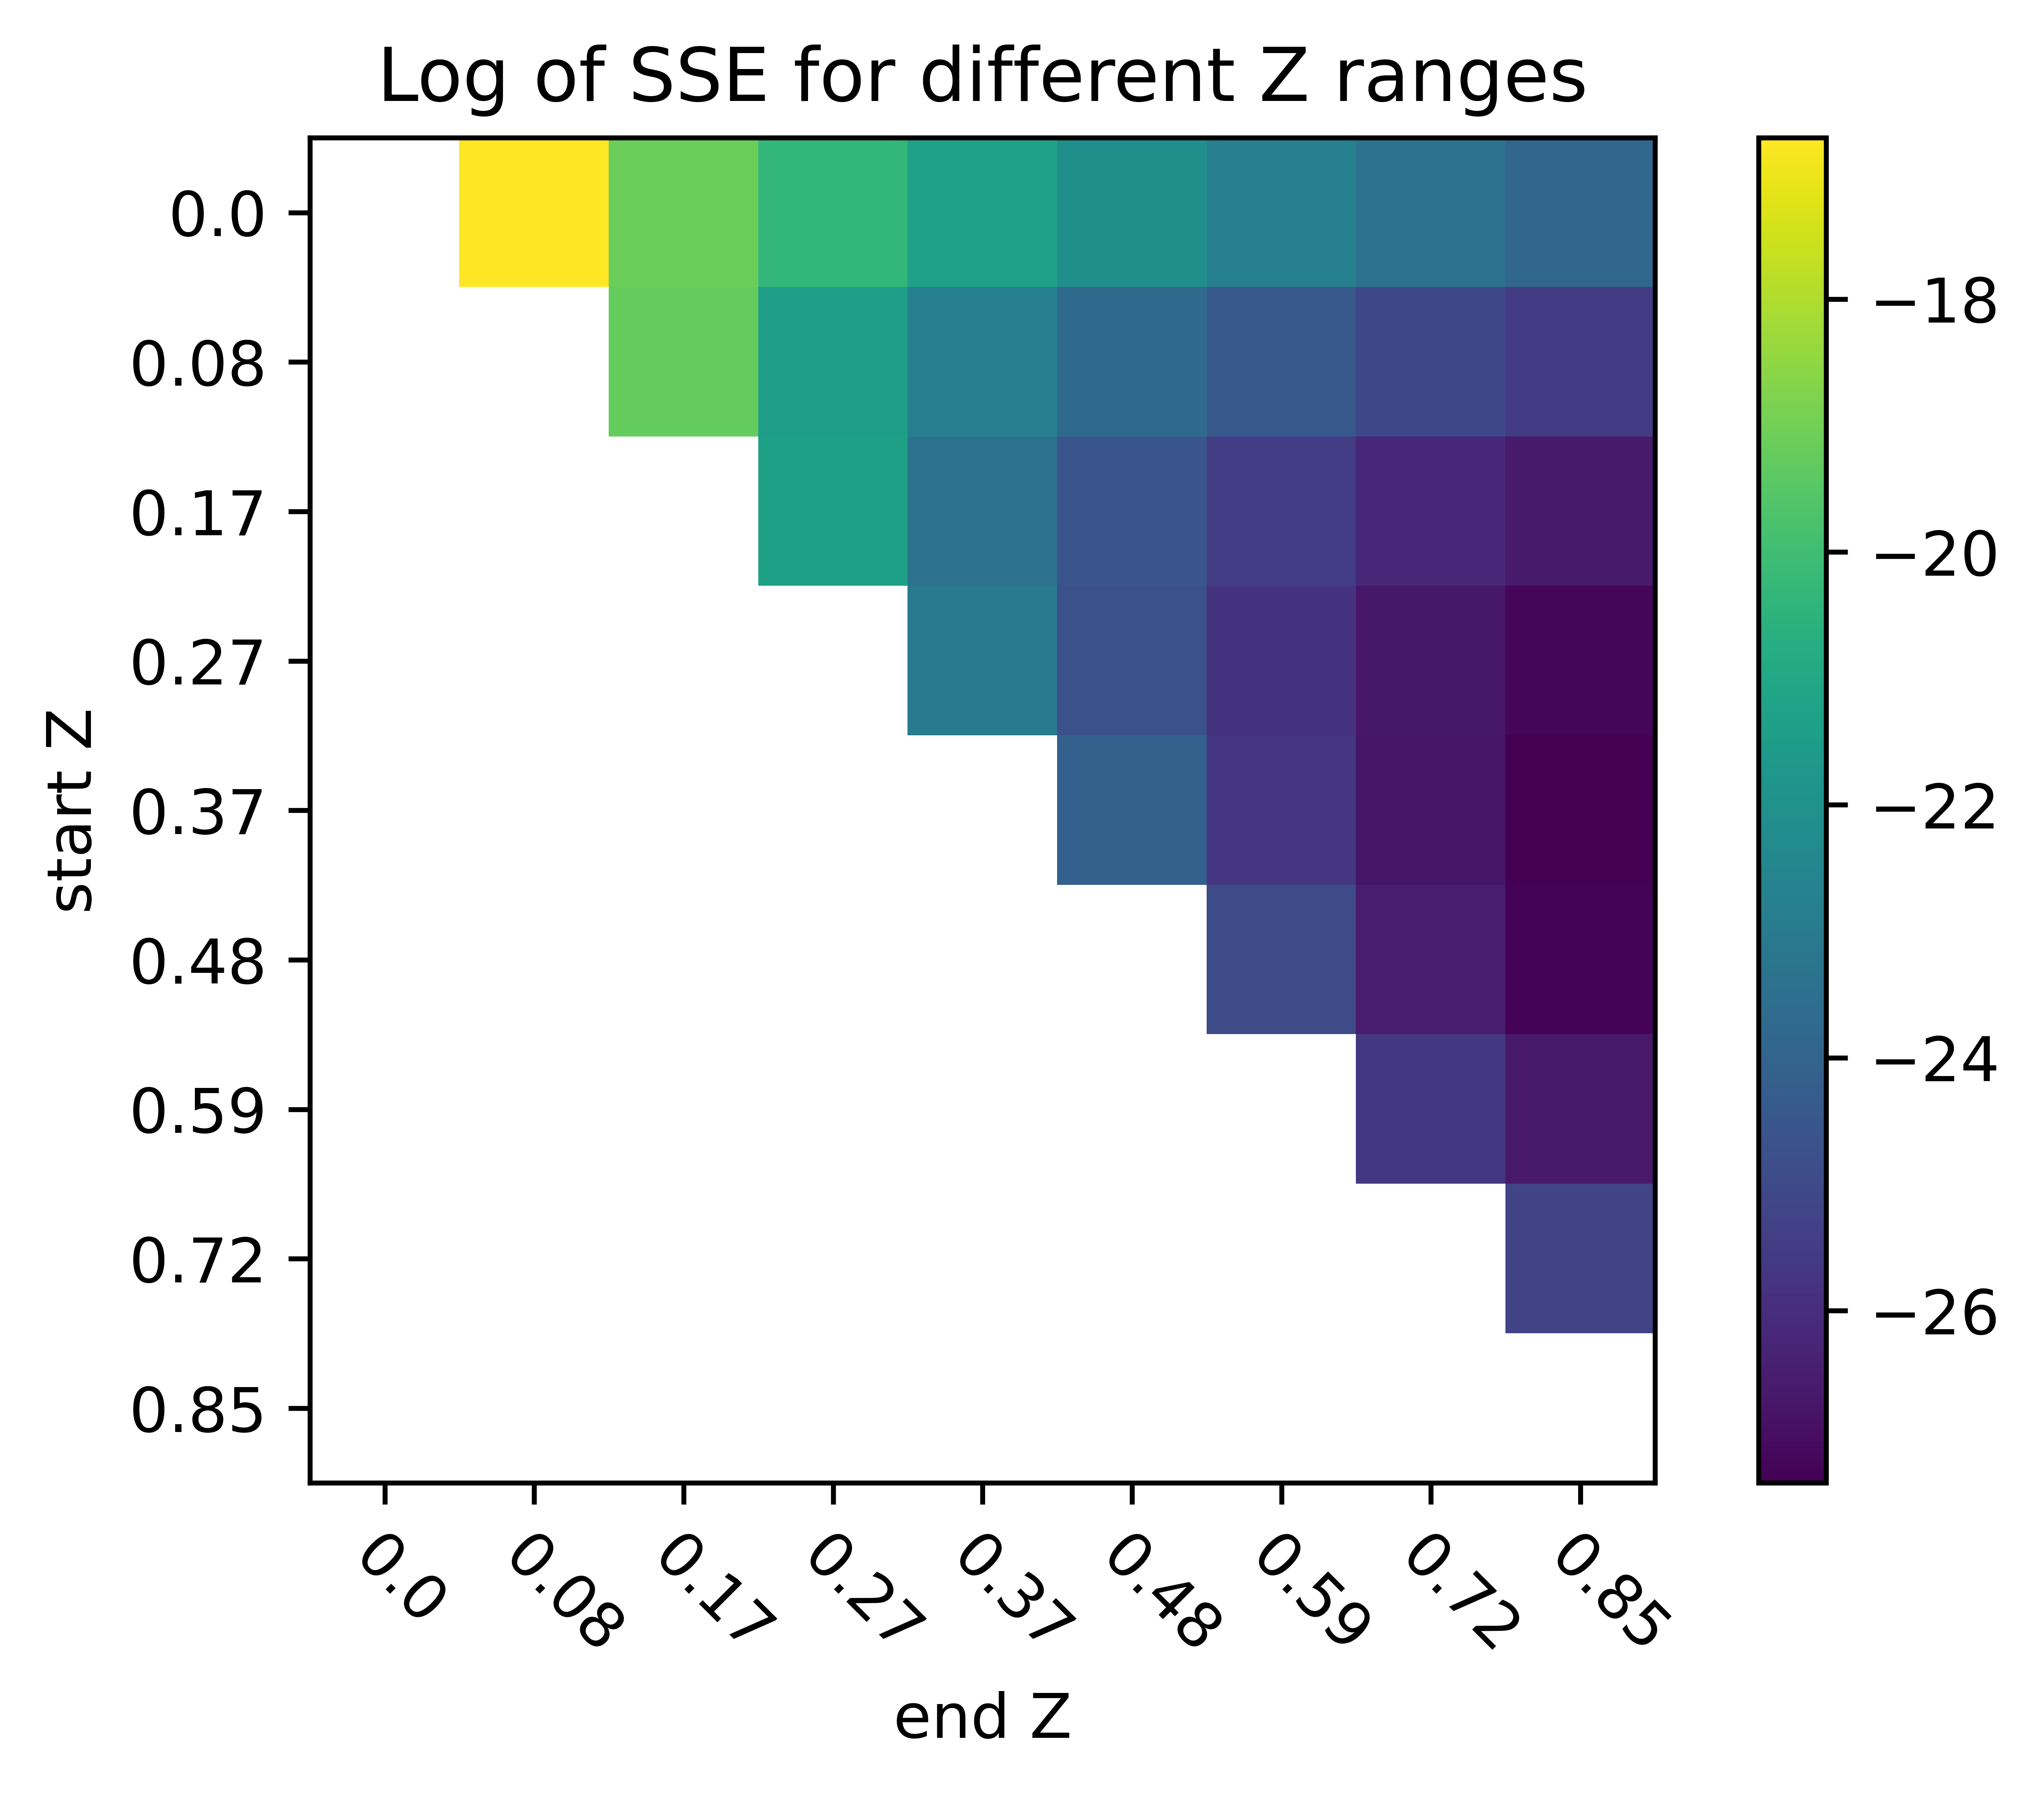

In [6]:
fig, ax = plt.subplots(dpi=1200)

im = ax.imshow(np.log(SSE));

labels = np.append(np.array([0.0]),z2048)[::10]

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(np.around(labels,2))
ax.set_yticklabels(np.around(labels,2))

plt.setp(ax.get_xticklabels(), rotation=-45, ha="left",
         rotation_mode="anchor")

plt.xlabel("end Z")
plt.ylabel("start Z")
ax.set_title("Log of SSE for different Z ranges")

fig.colorbar(im)

plt.show();

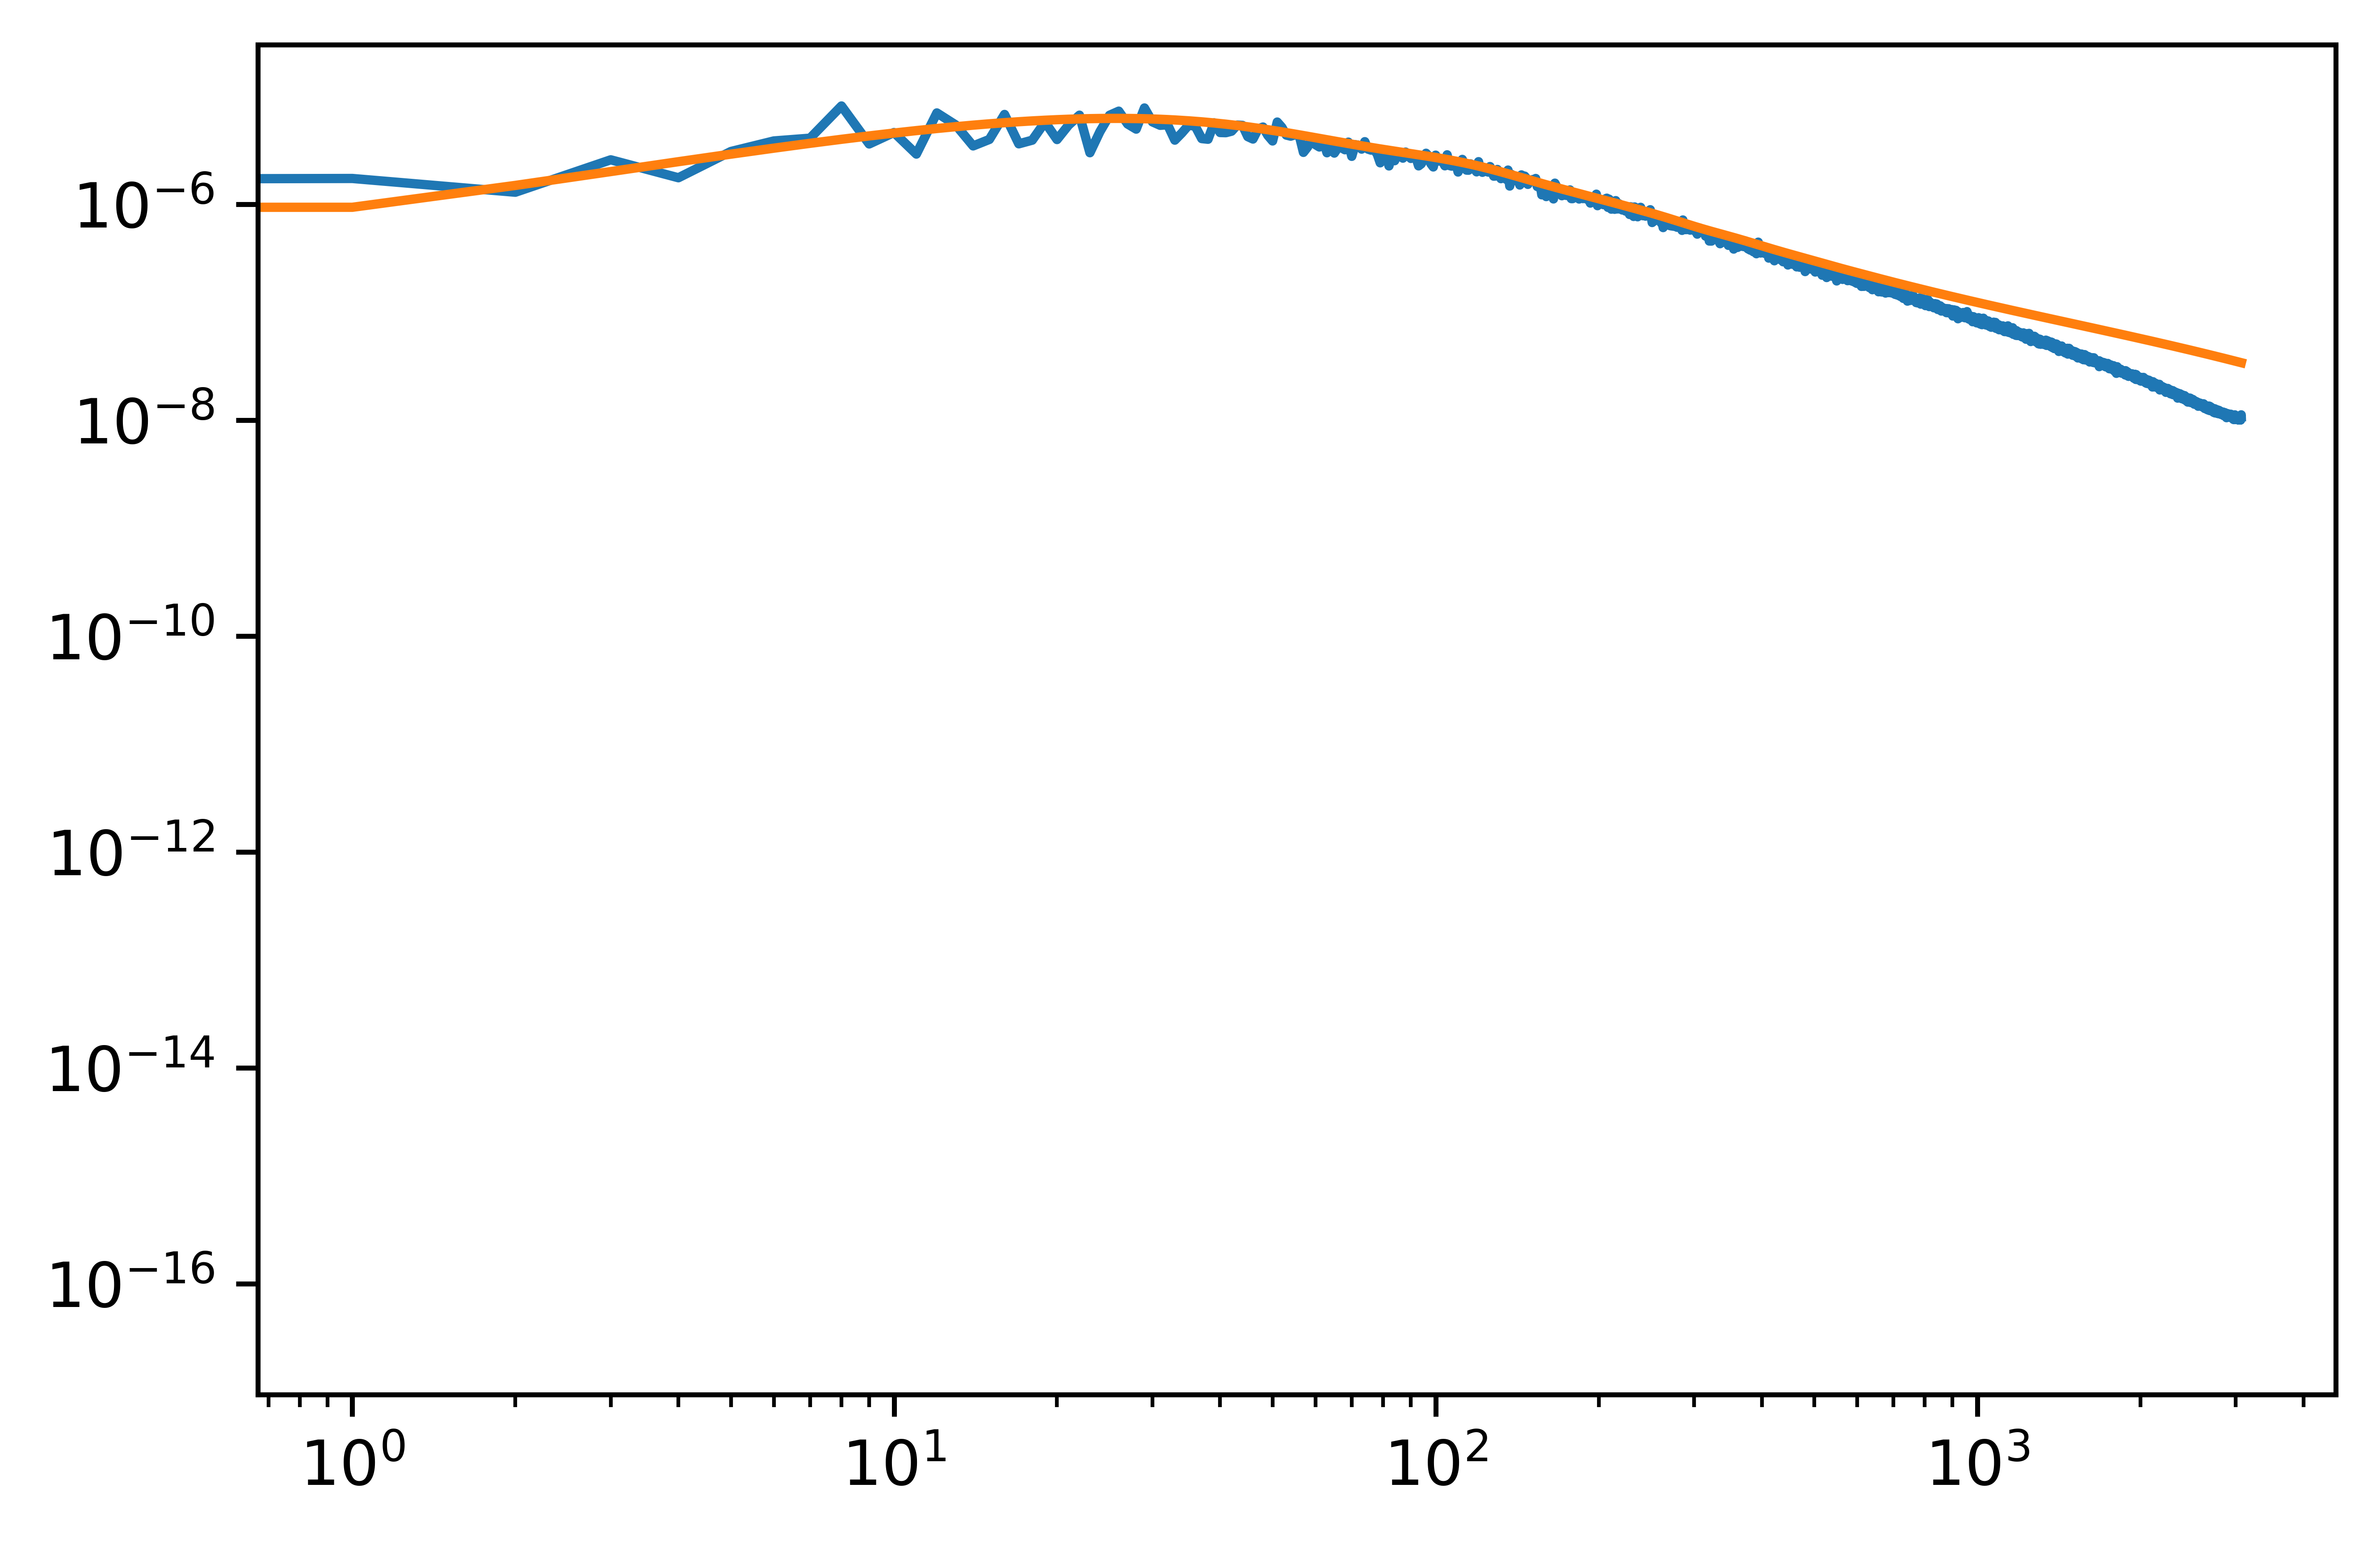

In [7]:
plt.figure(dpi=1000);
plt.loglog(simOut[5,8]);
plt.loglog(cclOut[5,8]);

In [8]:
#calculate the sum squared of the erros with l*(l+1) normalization
SSEls = np.sum(np.power(np.multiply(cclOut,ell*(ell+1))-np.multiply(simOut,ell*(ell+1)),2),axis=2)

/tmp/ipykernel_571/3739516418.py:3: RuntimeWarning: divide by zero encountered in log
  im = ax.imshow(np.log(SSEls));


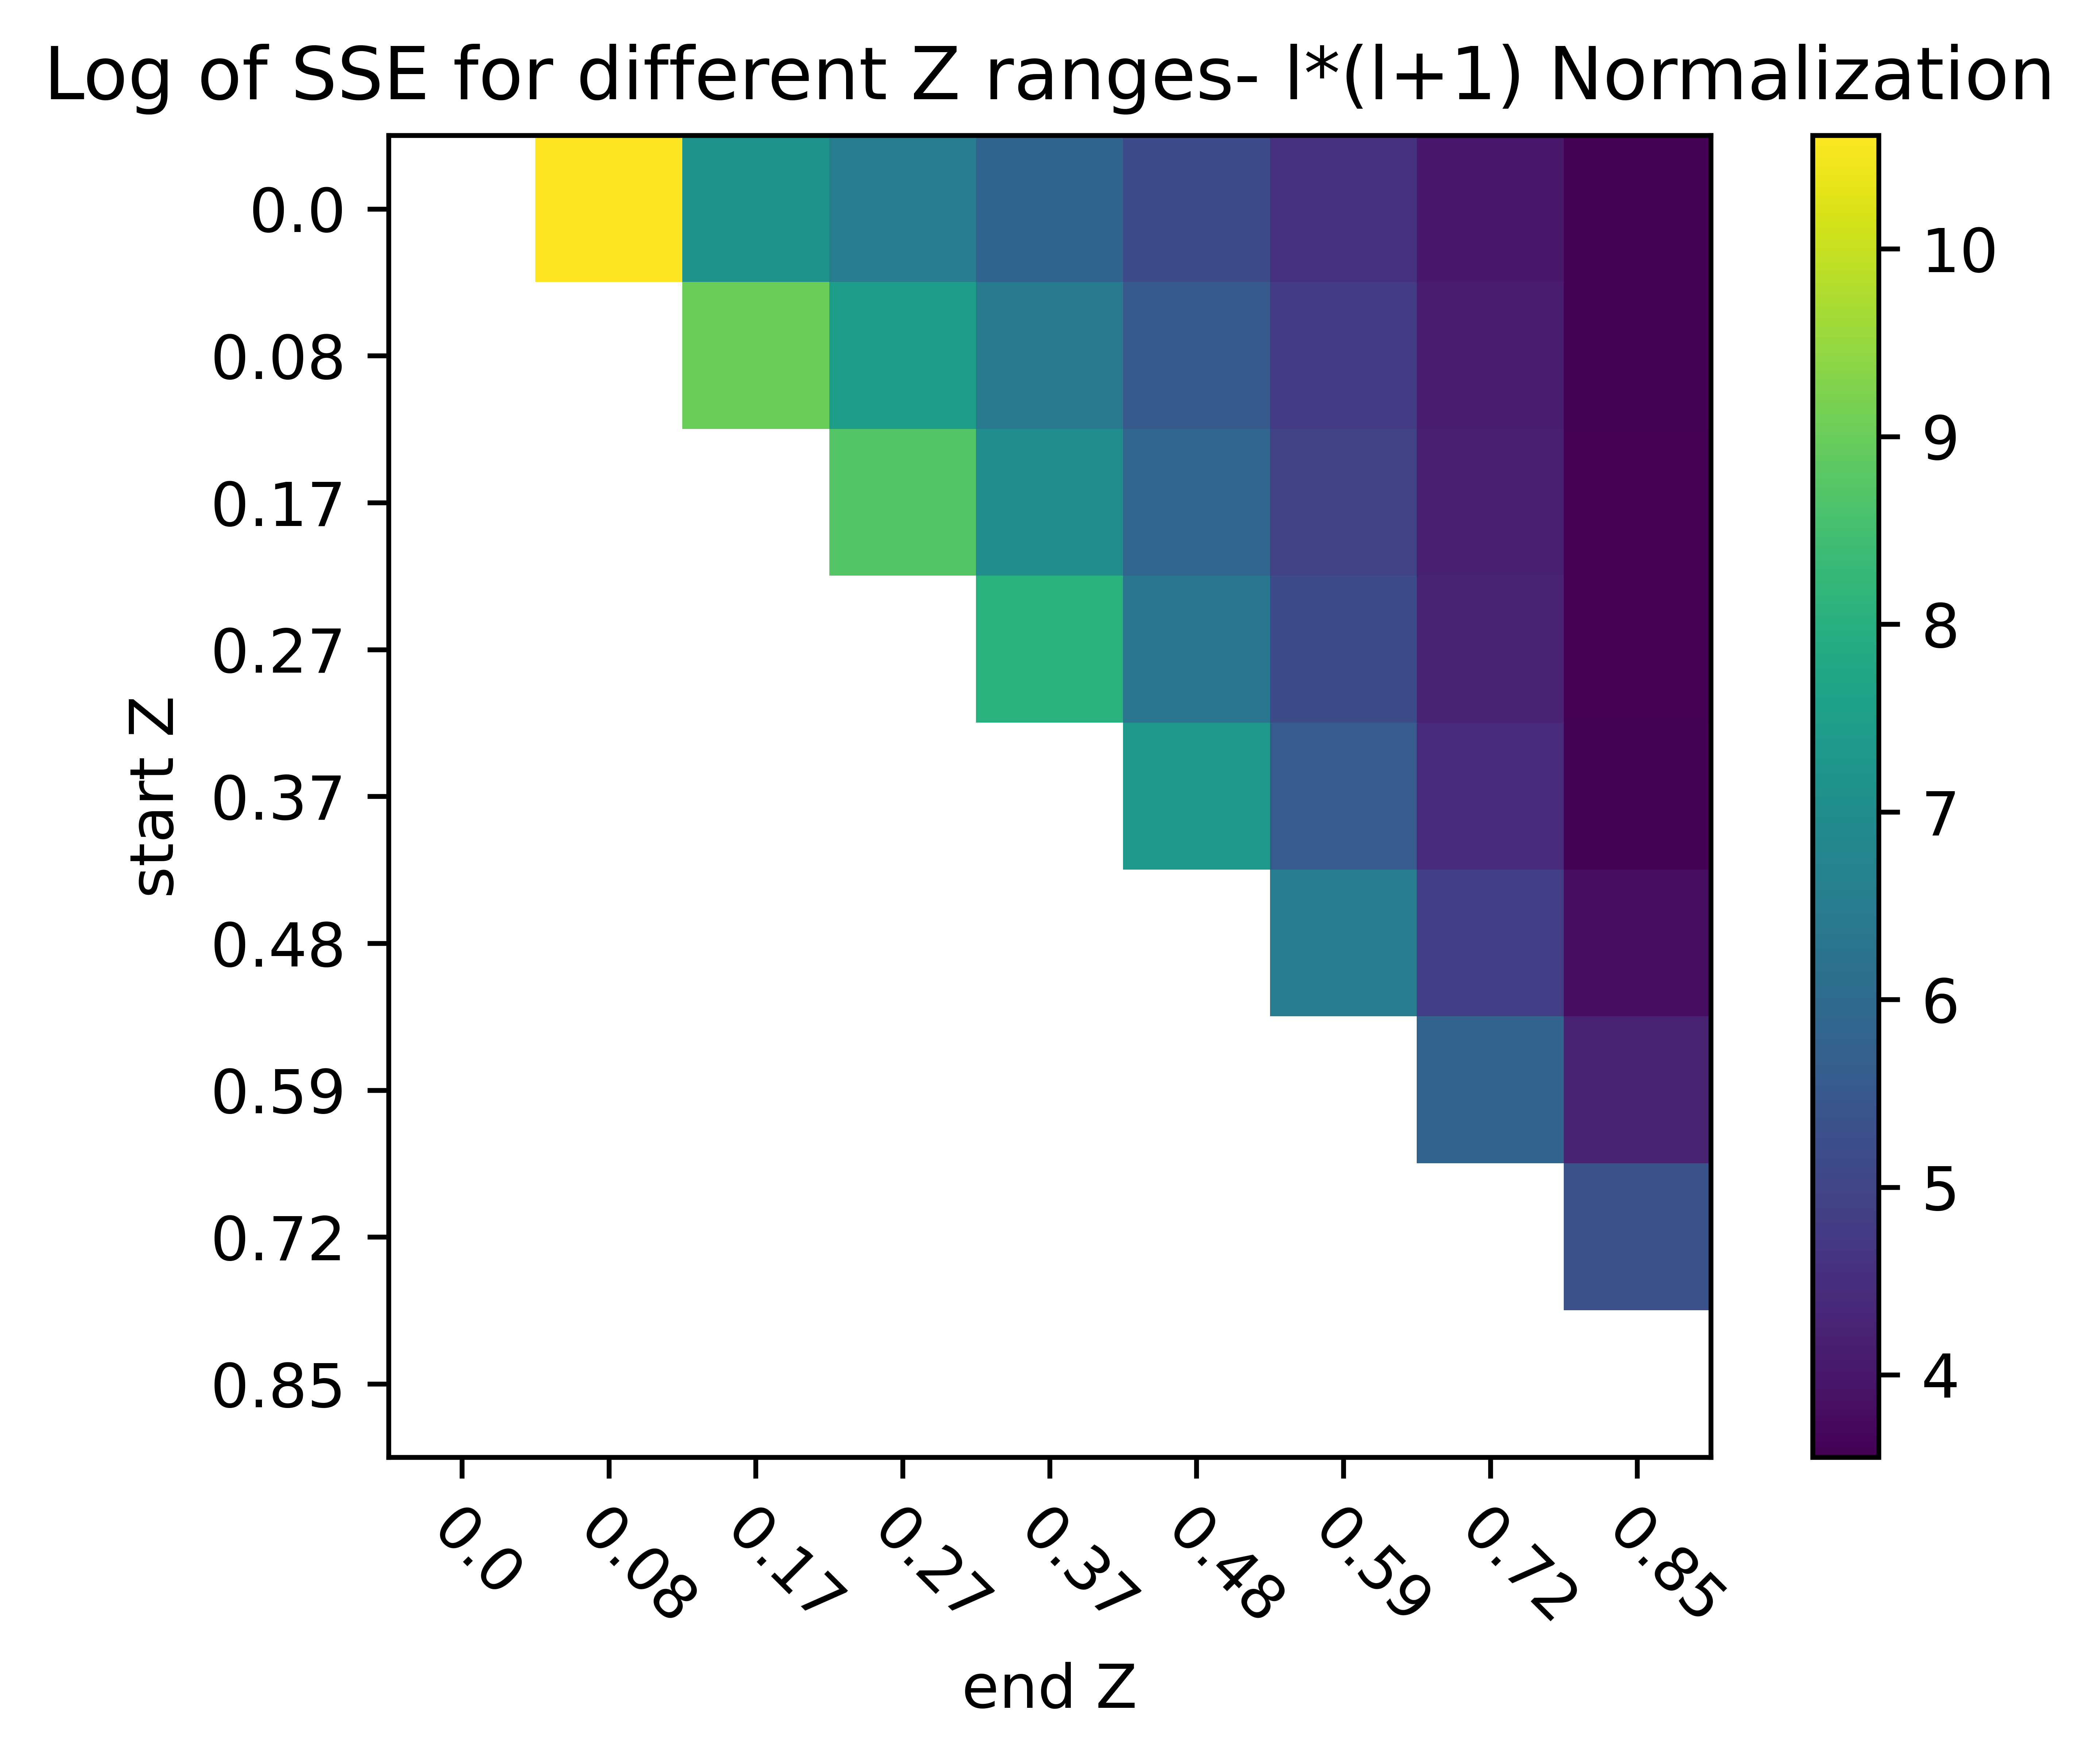

In [9]:
fig, ax = plt.subplots(dpi=1200)

im = ax.imshow(np.log(SSEls));

labels = np.append(np.array([0.0]),z2048)[::10]

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(np.around(labels,2))
ax.set_yticklabels(np.around(labels,2))

plt.setp(ax.get_xticklabels(), rotation=-45, ha="left",
         rotation_mode="anchor")

plt.xlabel("end Z")
plt.ylabel("start Z")
ax.set_title("Log of SSE for different Z ranges- l*(l+1) Normalization")

fig.colorbar(im)

plt.show();

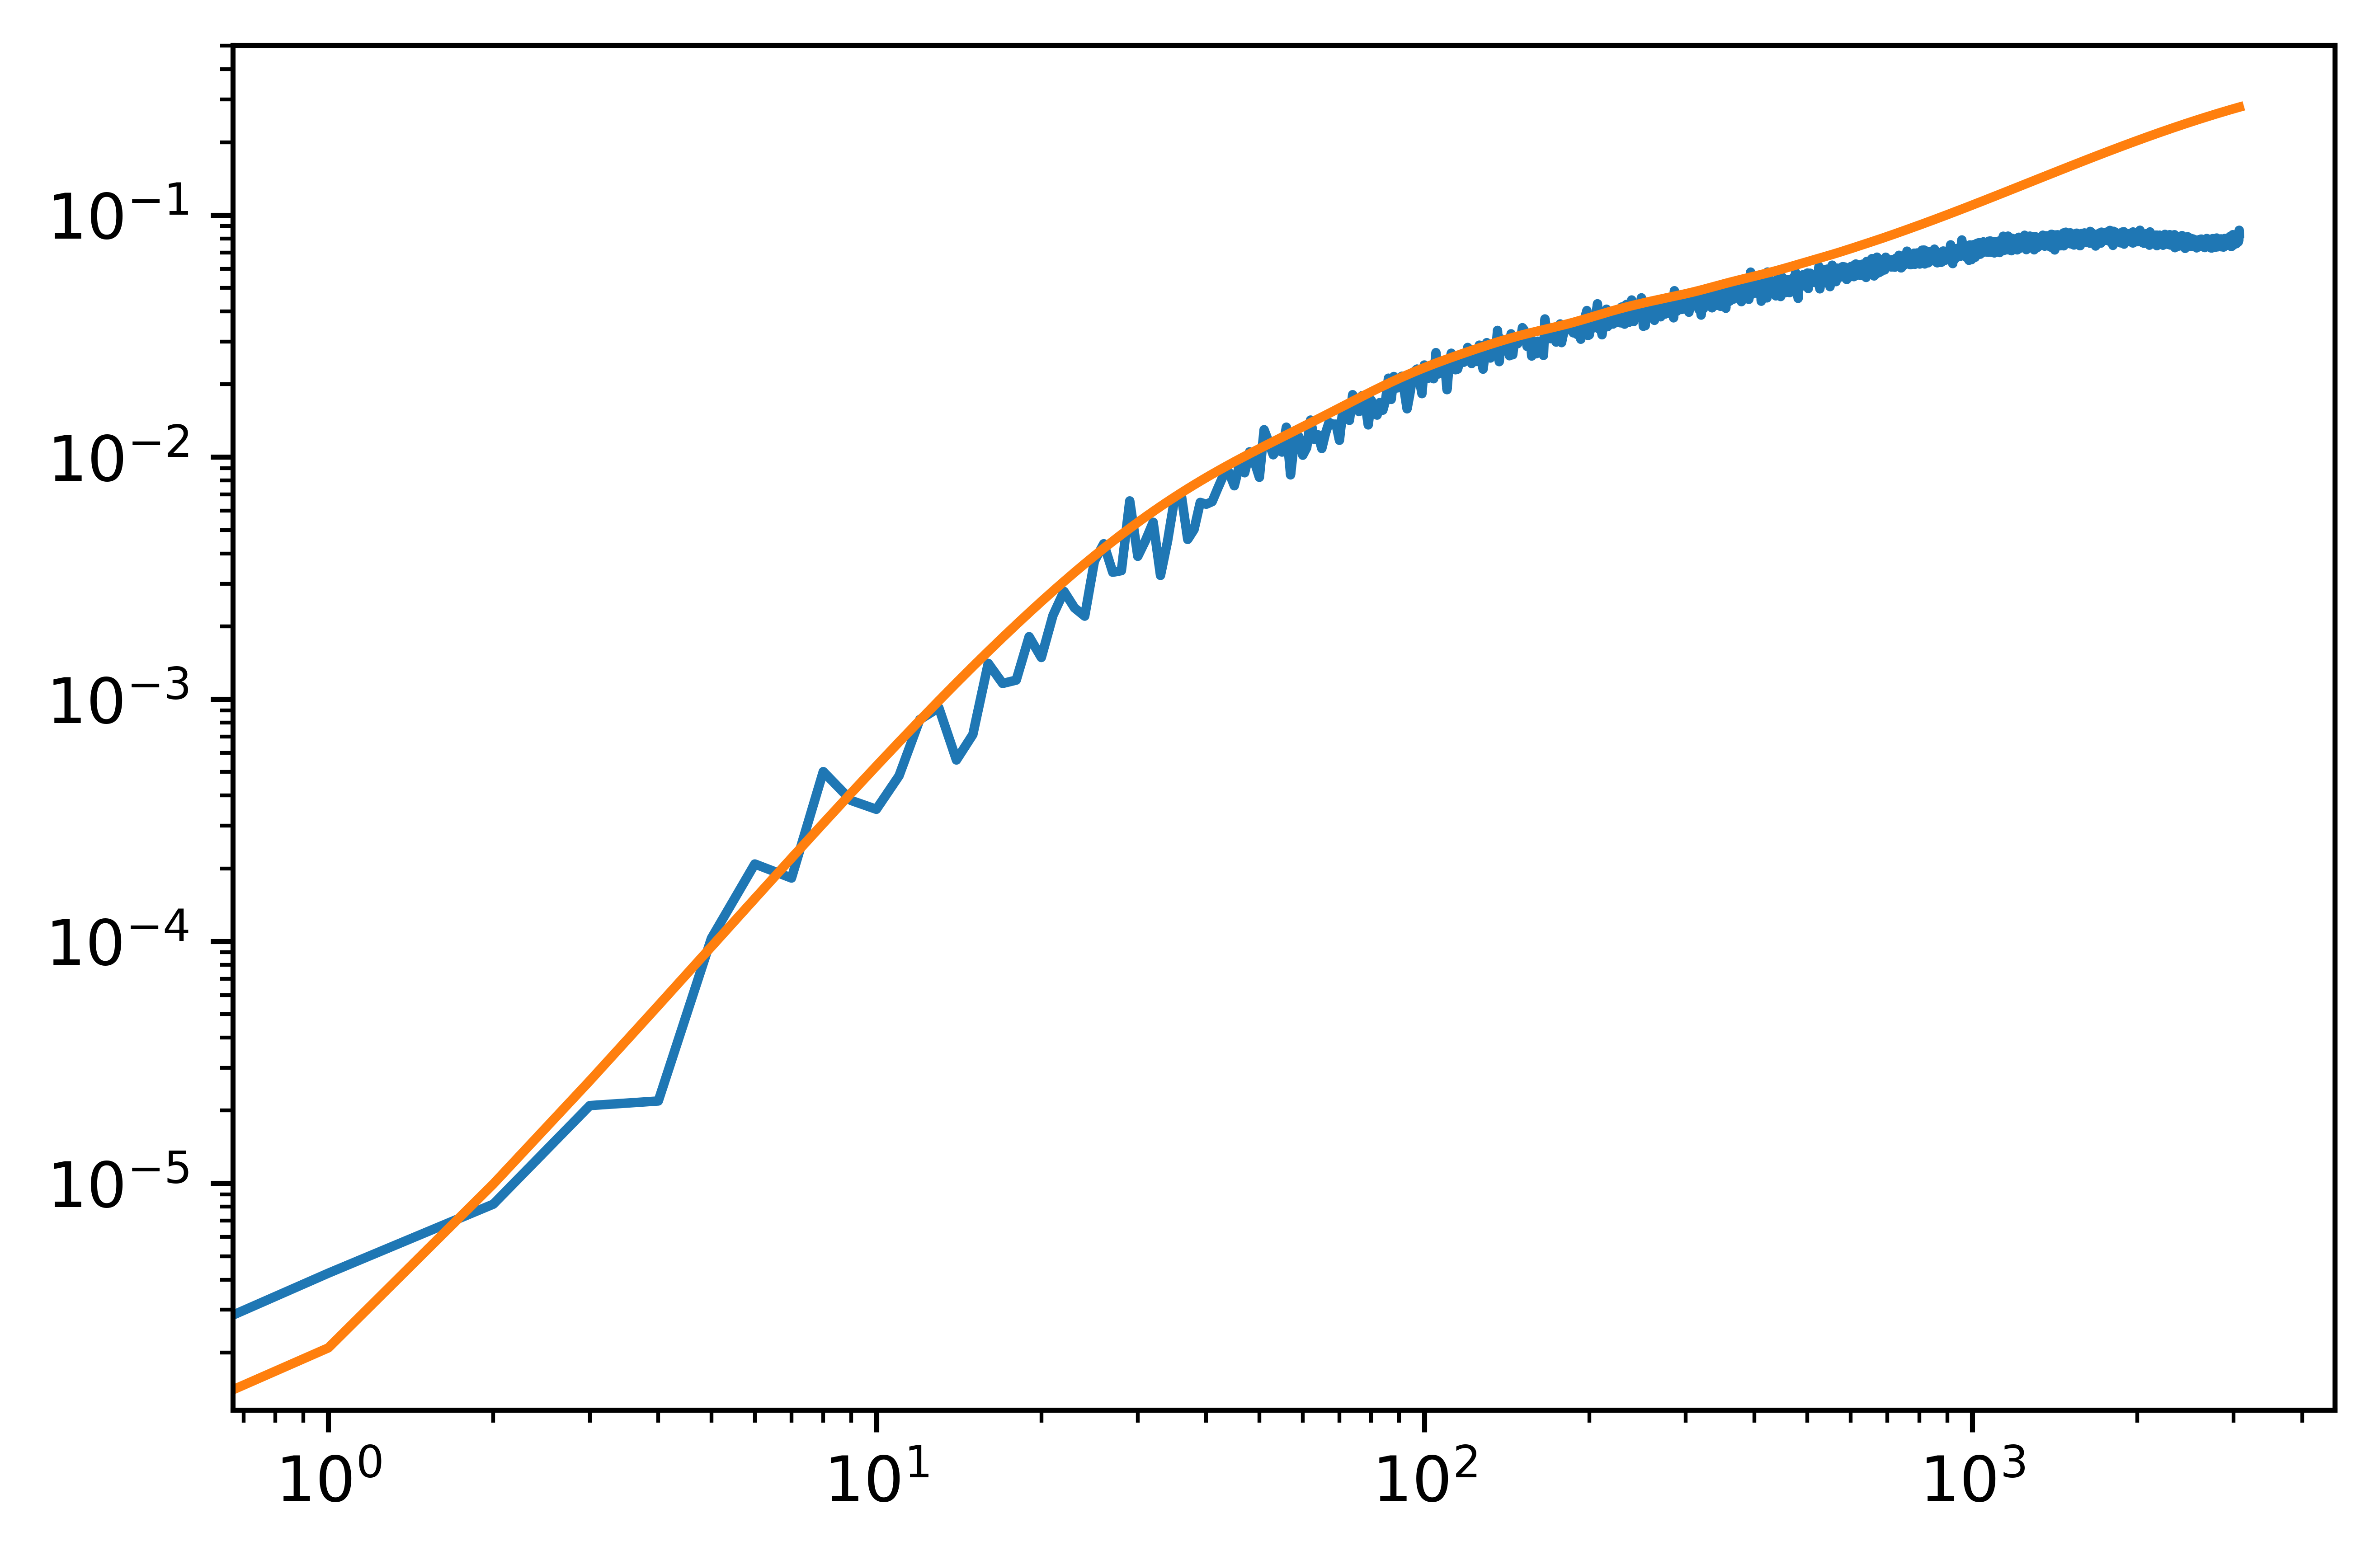

In [10]:
plt.figure(dpi=1000);
plt.loglog(simOut[4,8]*ell*(ell+1));
plt.loglog(cclOut[4,8]*(ell)*(ell+1));

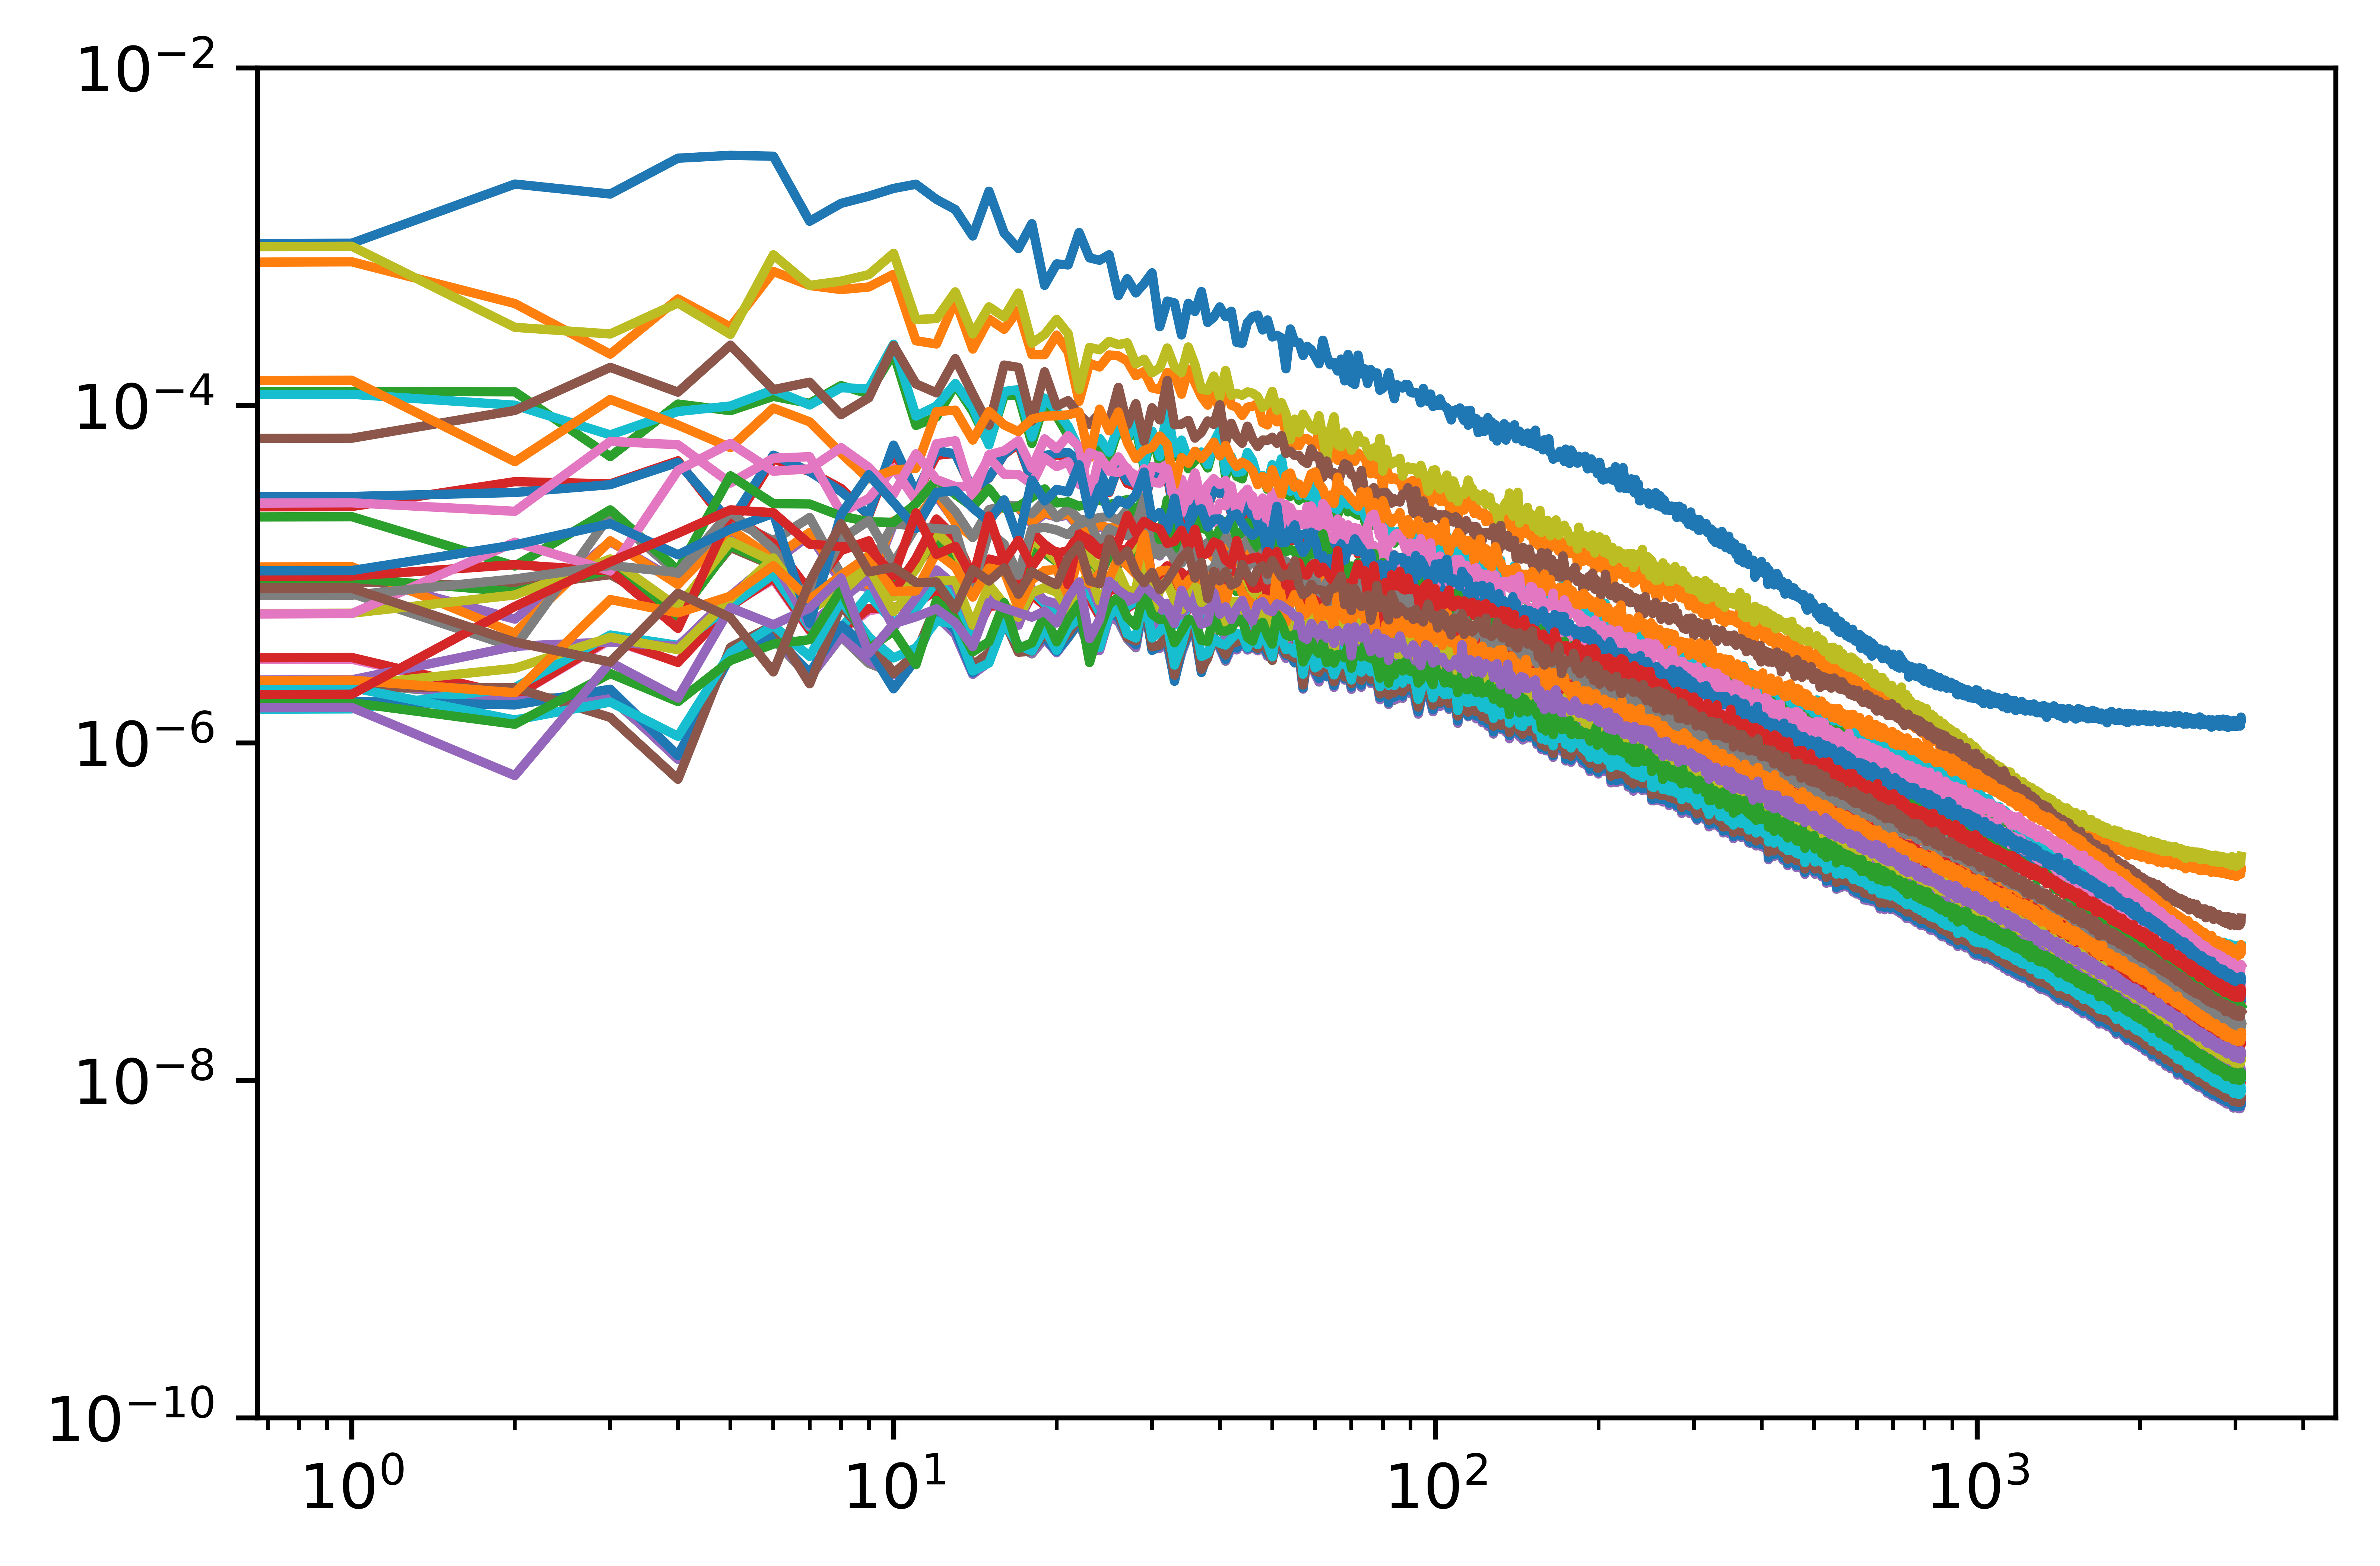

In [11]:
plt.figure(dpi=1200)
for start in range(0,numSections):
    for end in range(start+1, numSections+1):
        plt.loglog(simOut[start,end])
        
plt.ylim(10**-10,10**-2);

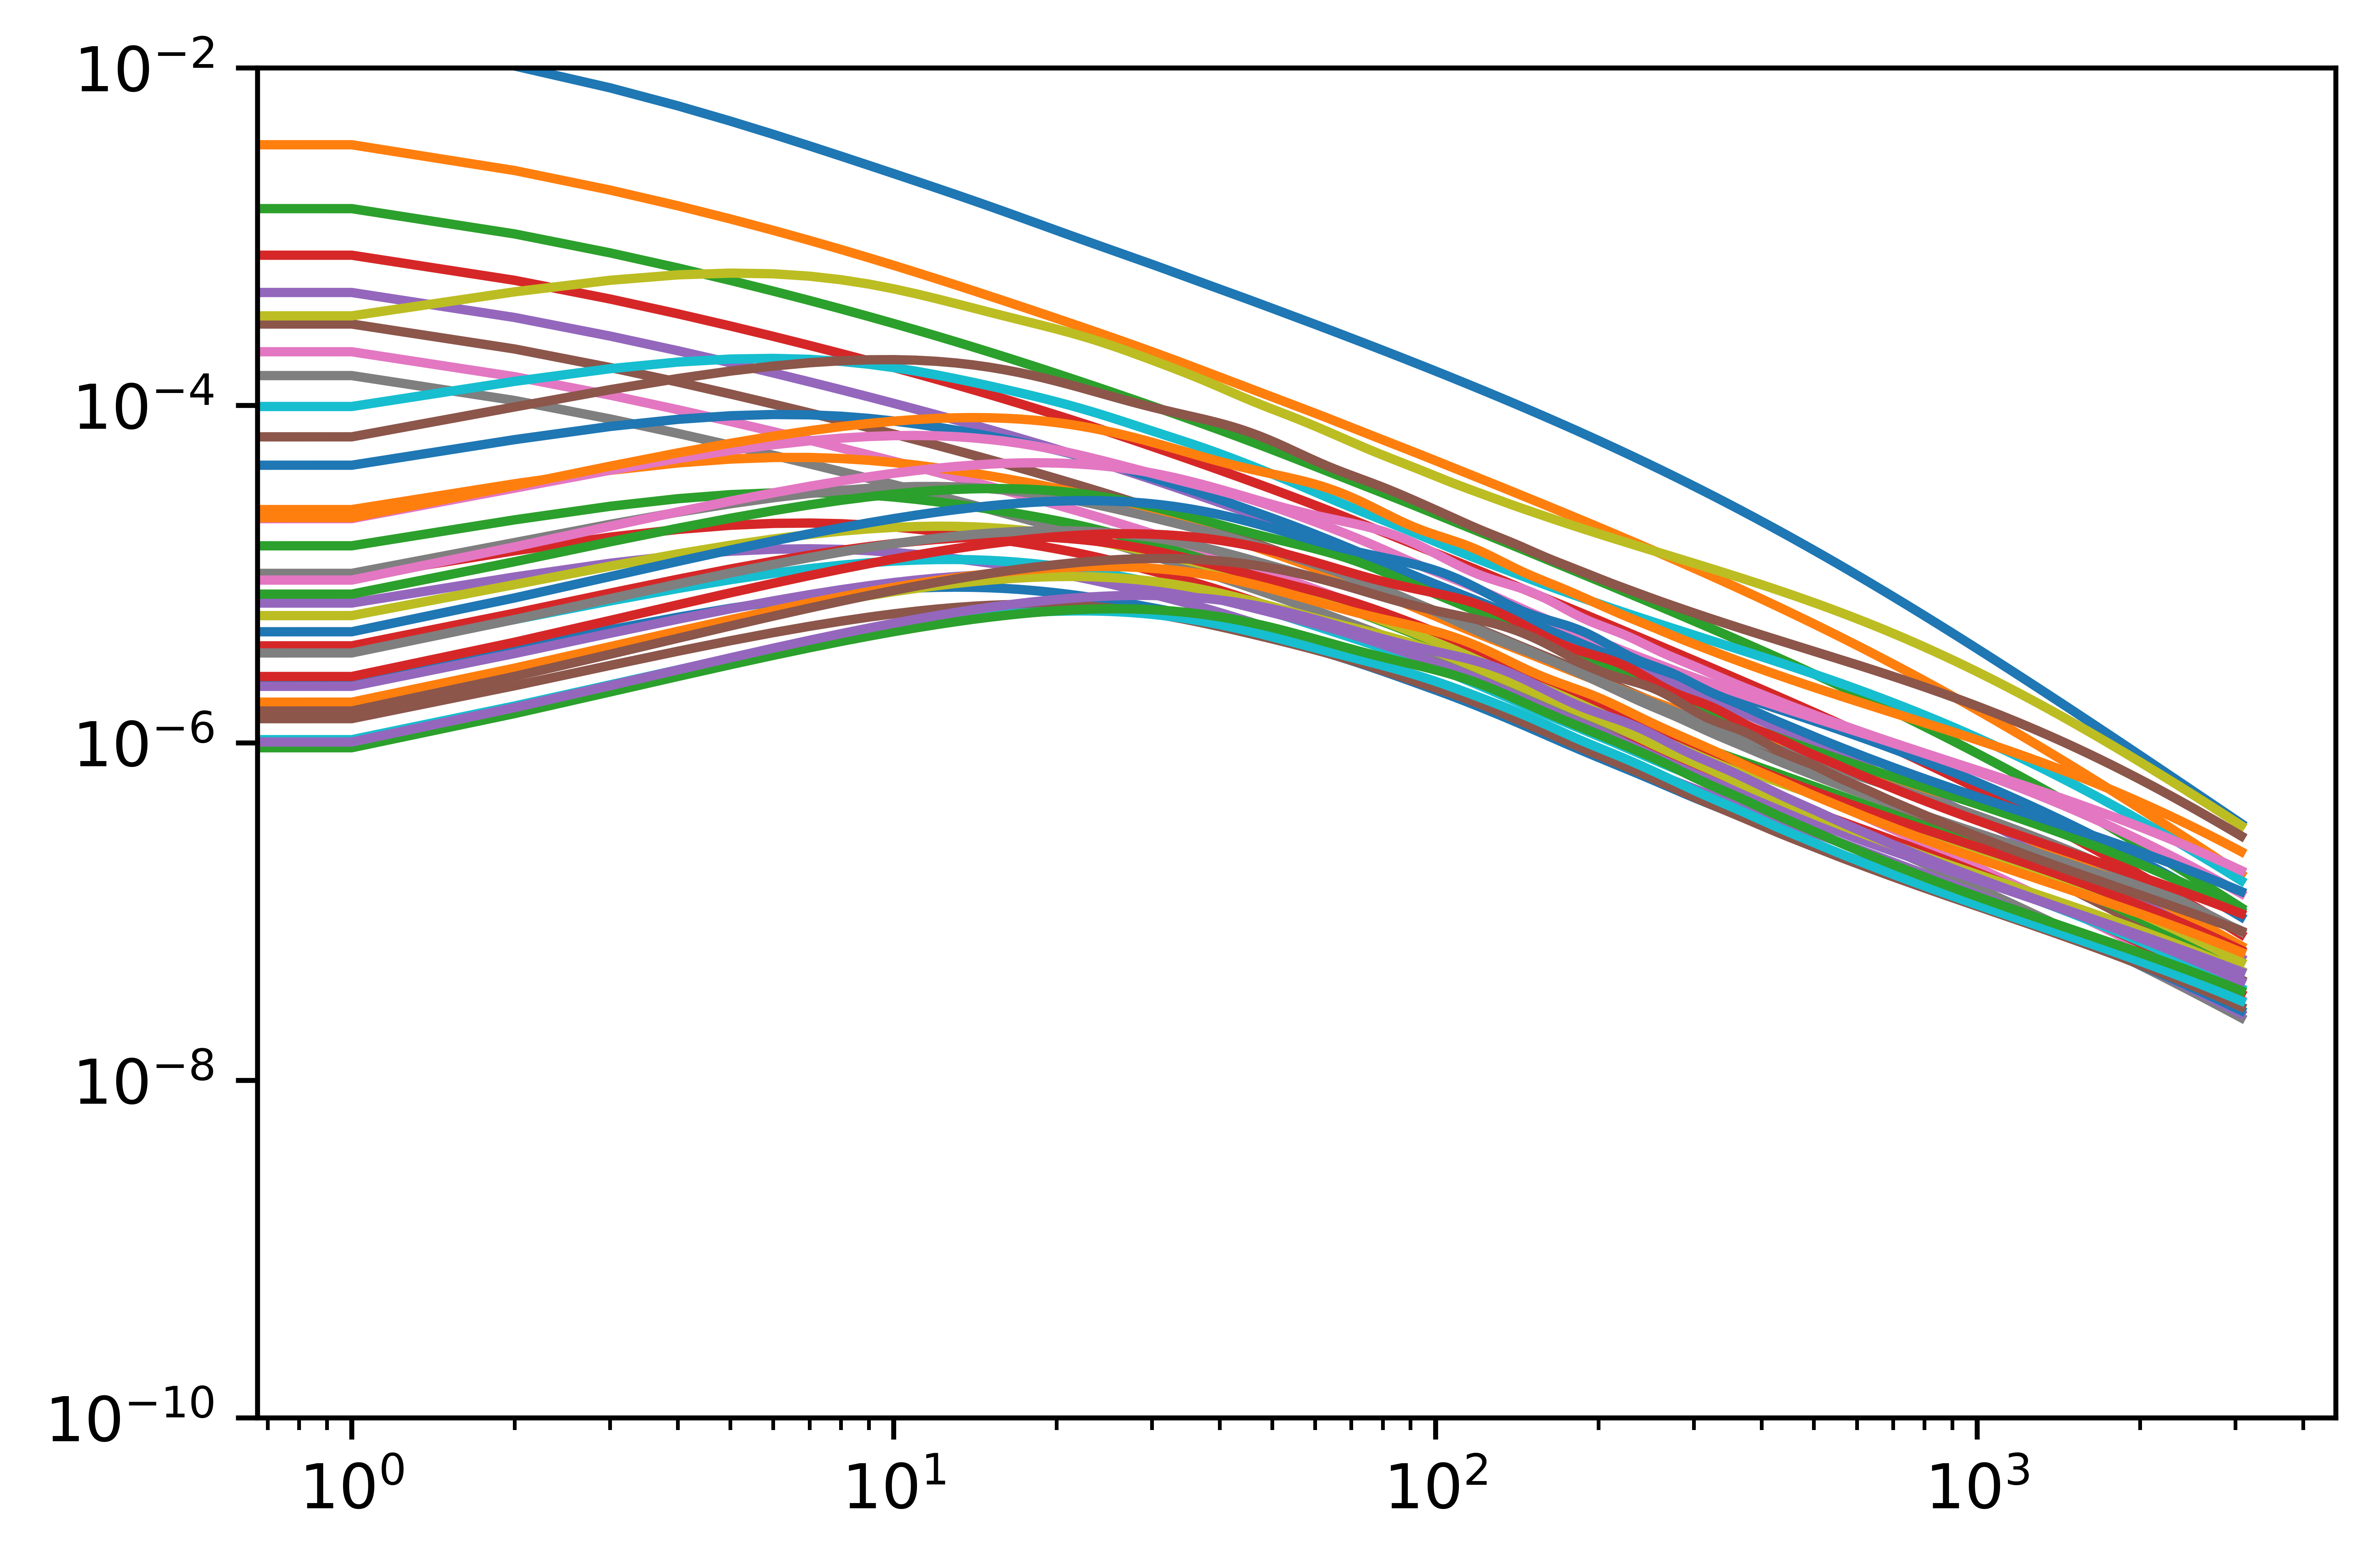

In [12]:
plt.figure(dpi=1200)
for start in range(0,numSections):
    for end in range(start+1, numSections+1):
        plt.loglog(cclOut[start,end])
        
plt.ylim(10**-10,10**-2);

/tmp/ipykernel_571/3670949453.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=100)


<Figure size 7200x4800 with 0 Axes>

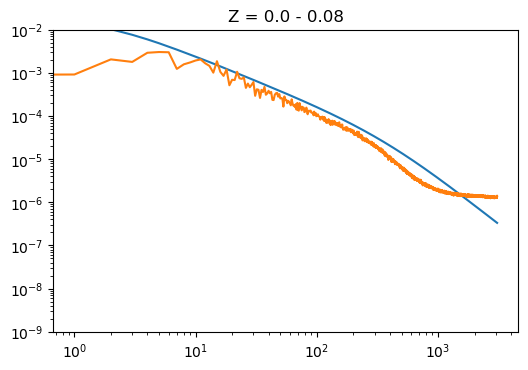

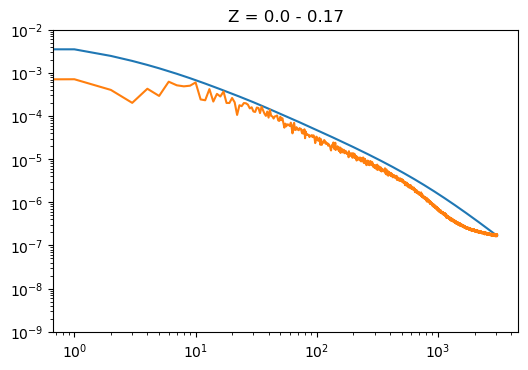

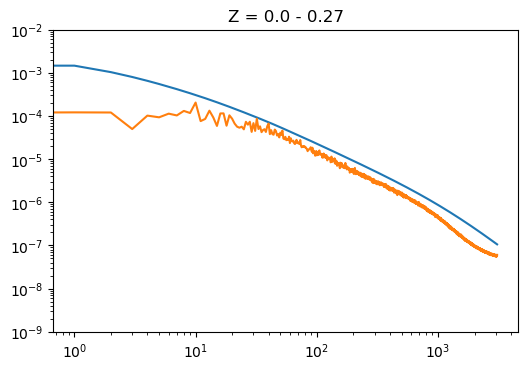

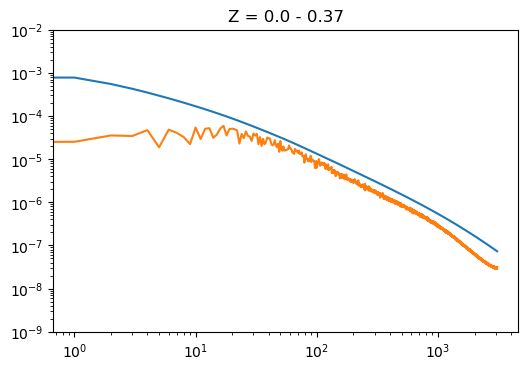

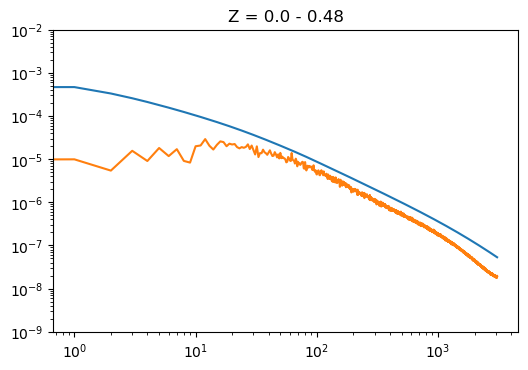

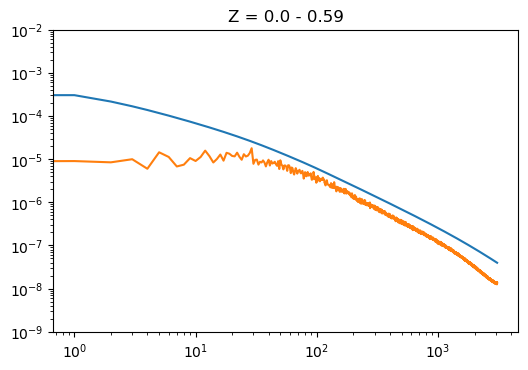

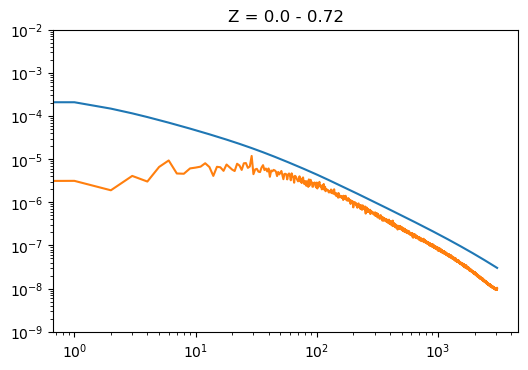

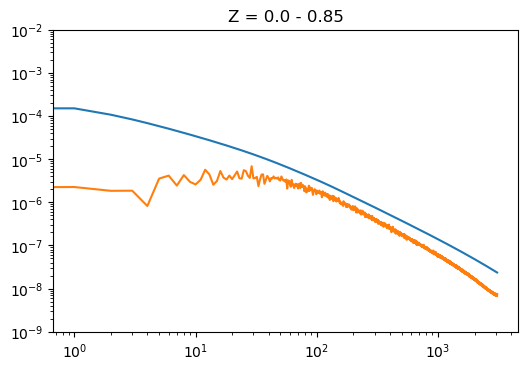

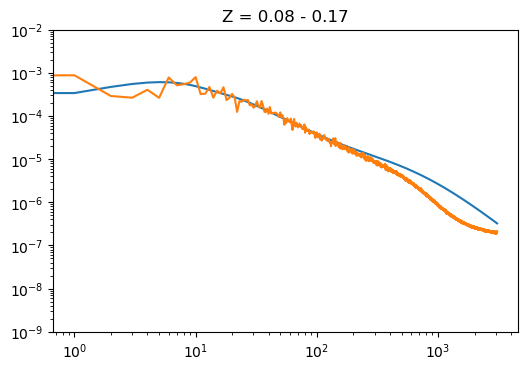

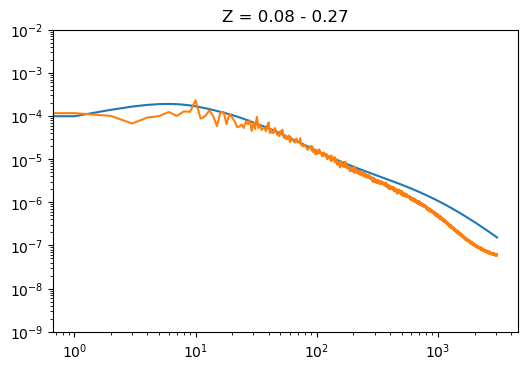

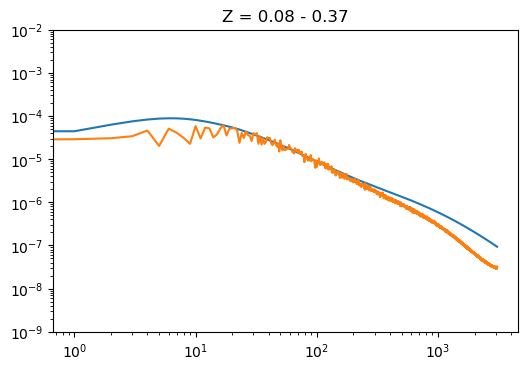

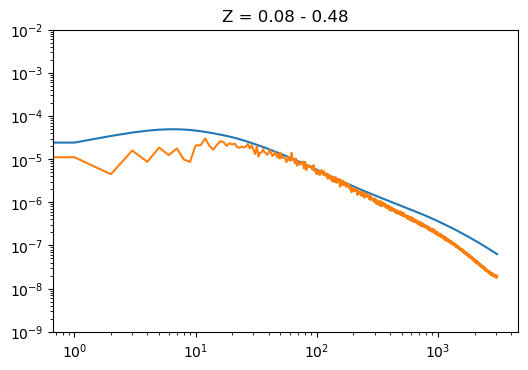

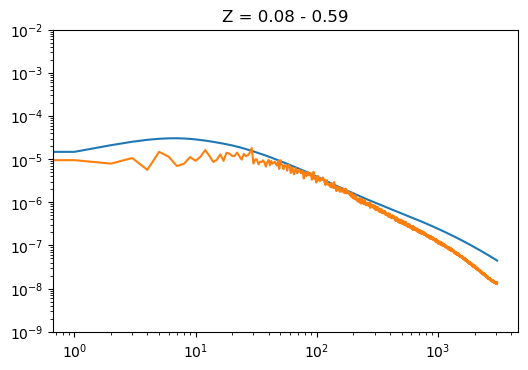

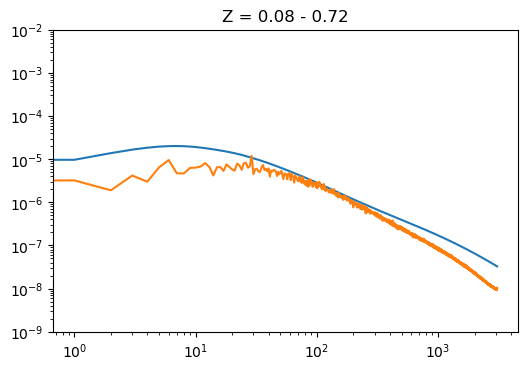

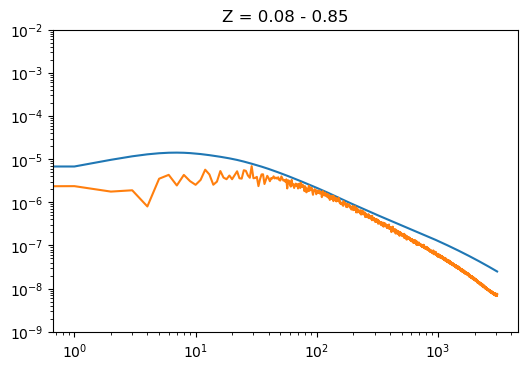

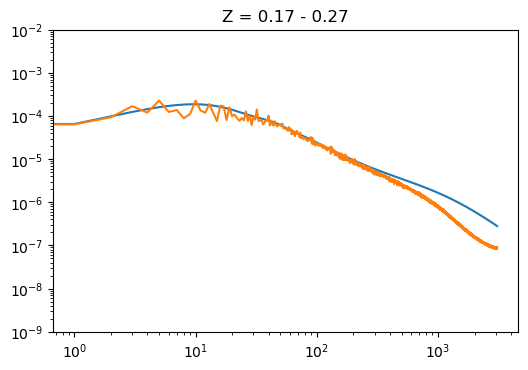

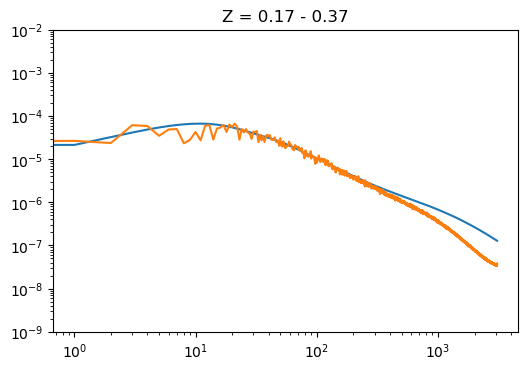

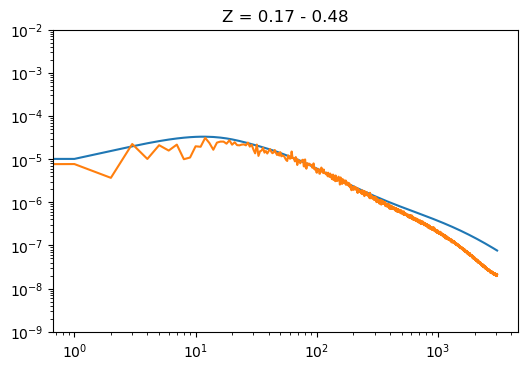

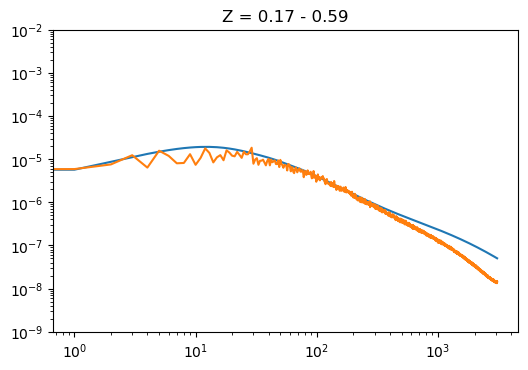

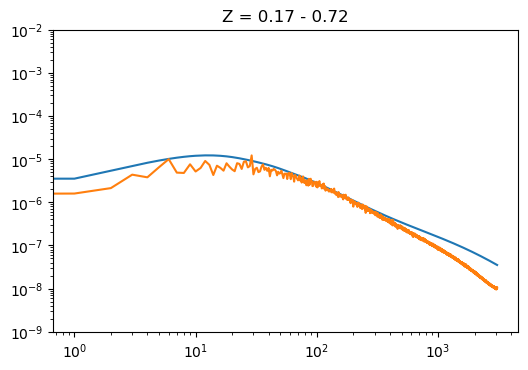

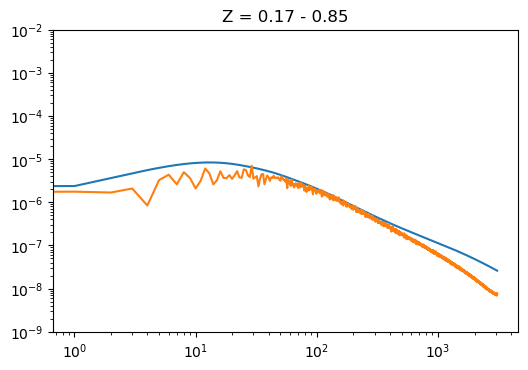

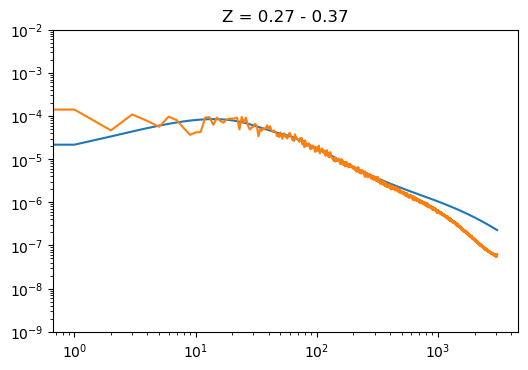

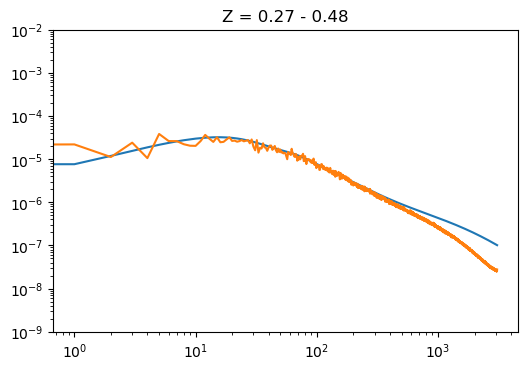

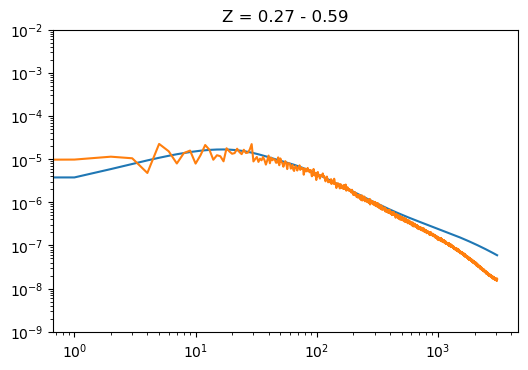

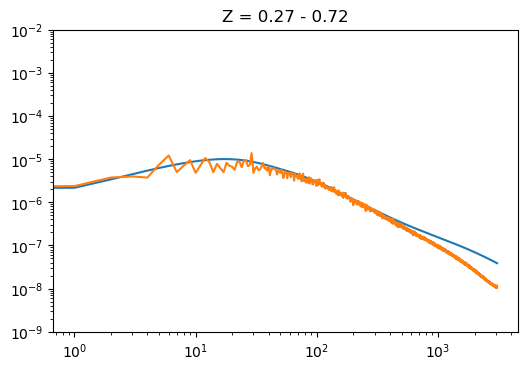

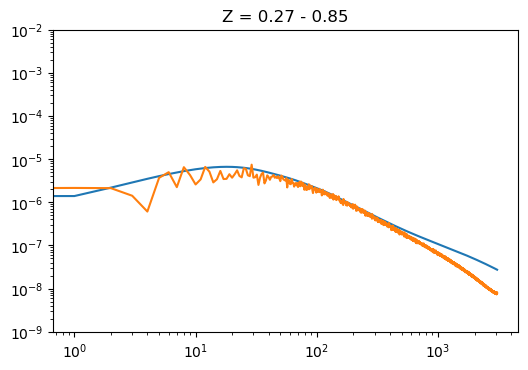

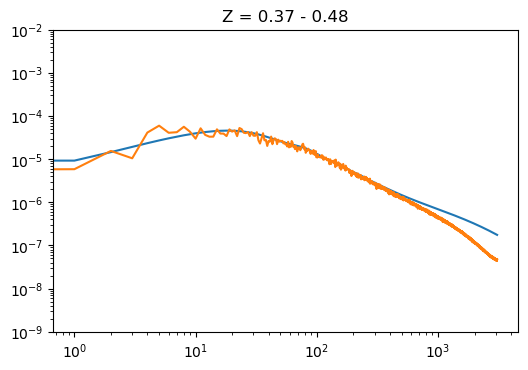

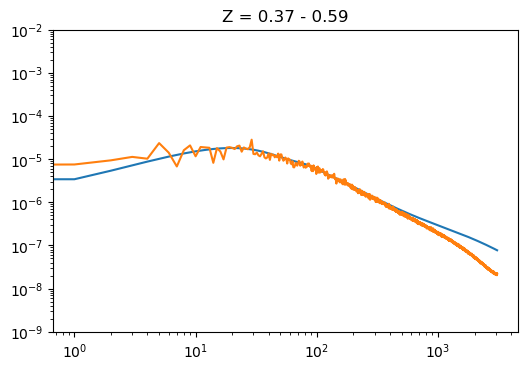

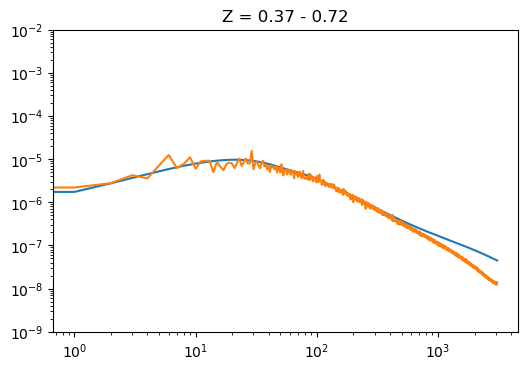

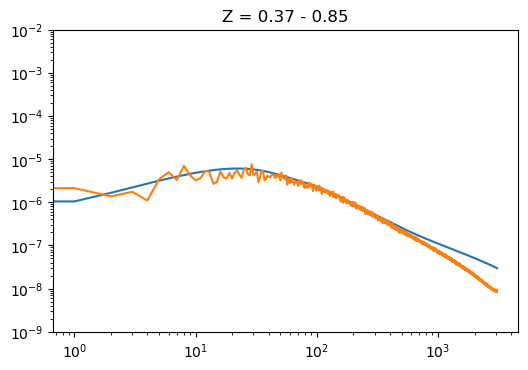

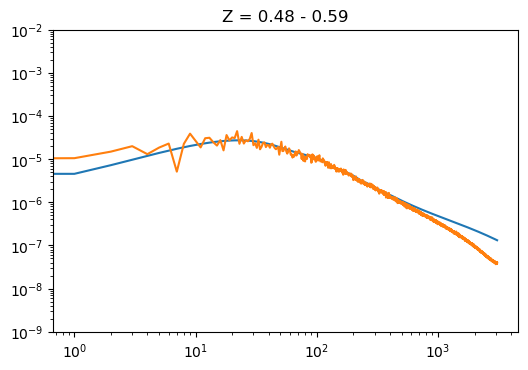

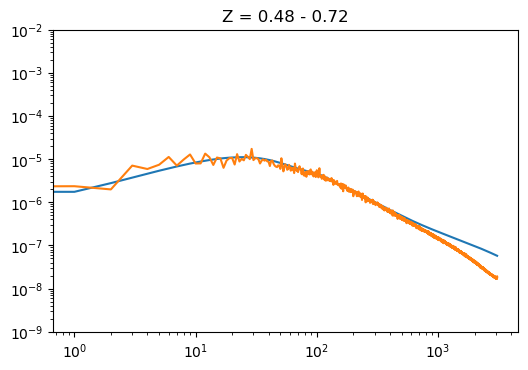

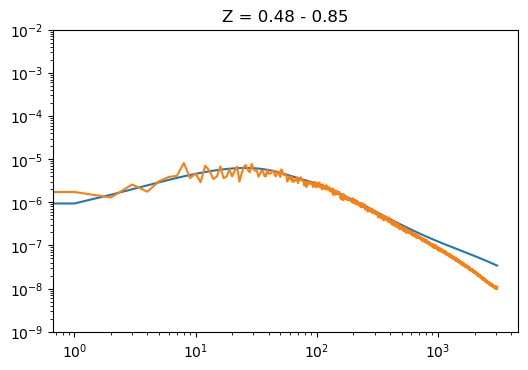

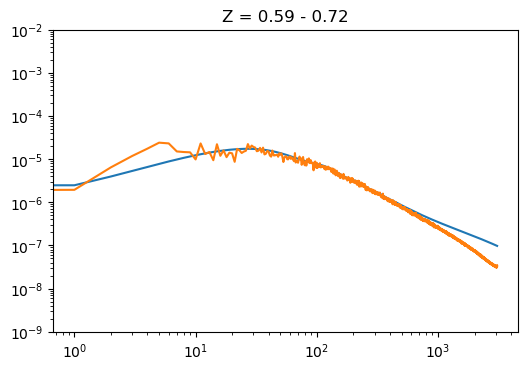

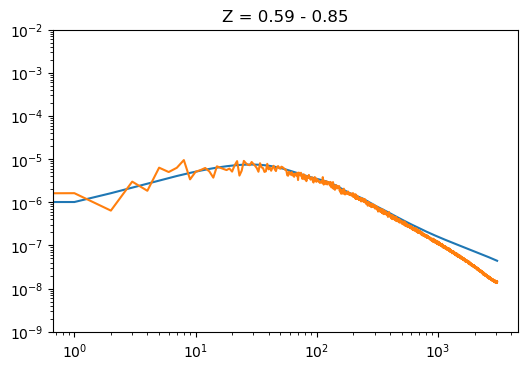

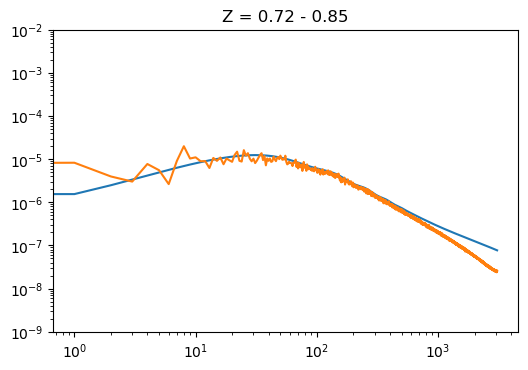

In [13]:
plt.figure(dpi=1200)
for start in range(0,numSections):
    for end in range(start+1, numSections+1):
        plt.figure(dpi=100)
        plt.loglog(cclOut[start,end])
        plt.loglog(simOut[start,end])
        plt.title("Z = " +str(np.around(labels[start],2))+" - "+str(np.around(labels[end],2)))
        plt.ylim(10**-9,10**-2);

In [14]:
# plt.figure(dpi=1200)
# for start in range(0,numSections):
#     for end in range(start+1, numSections+1):
#         plt.figure(dpi=100)
#         plt.loglog(cclOut[start,end]*ell*(ell+1))
#         plt.loglog(simOut[start,end]*ell*(ell+1))
#         plt.title(str(start)+" - "+str(end))
#         #plt.ylim(10**-9,10**-2);

## Convergence

In [15]:
convergence=np.load("MAPS/convergence_NS_1024_R_2968_P_2048_DV_80.npy")

In [16]:
cclOutK = np.zeros((numDivs,len(ell)))
simOutK = np.zeros((numDivs,len(ell)))

In [17]:
for i in range(5,numDivs):
    #cosmo = ccl.Cosmology(Omega_c = 0.262, Omega_b = 0.048, h = 0.69, sigma8 = 0.83, n_s = 0.96)
    dNdz = np.zeros(z2048.shape)
    dNdz[0:i]=1
    
    lens2048 = ccl.WeakLensingTracer(cosmo, dndz=(z2048, dNdz)) #CCL automatically normalizes dNdz
    cclOutK[i] = ccl.angular_cl(cosmo, lens2048, lens2048,ell)
    
    simOutK[i] = hp.sphtfunc.anafast(convergence[i])

In [18]:
SSEK = np.sum(np.power(cclOutK[5:,:]-simOutK[5:,:],2),axis=1)
SSEKNorm = np.sum(np.power(cclOutK[5:,:]-simOutK[5:,:],2),axis=1)/np.mean((cclOutK[5:,:]+simOutK[5:,:])/2,axis=1)
RatioError = np.sum(np.power(cclOutK[5:,:]/simOutK[5:,:]-1,2),axis=1)

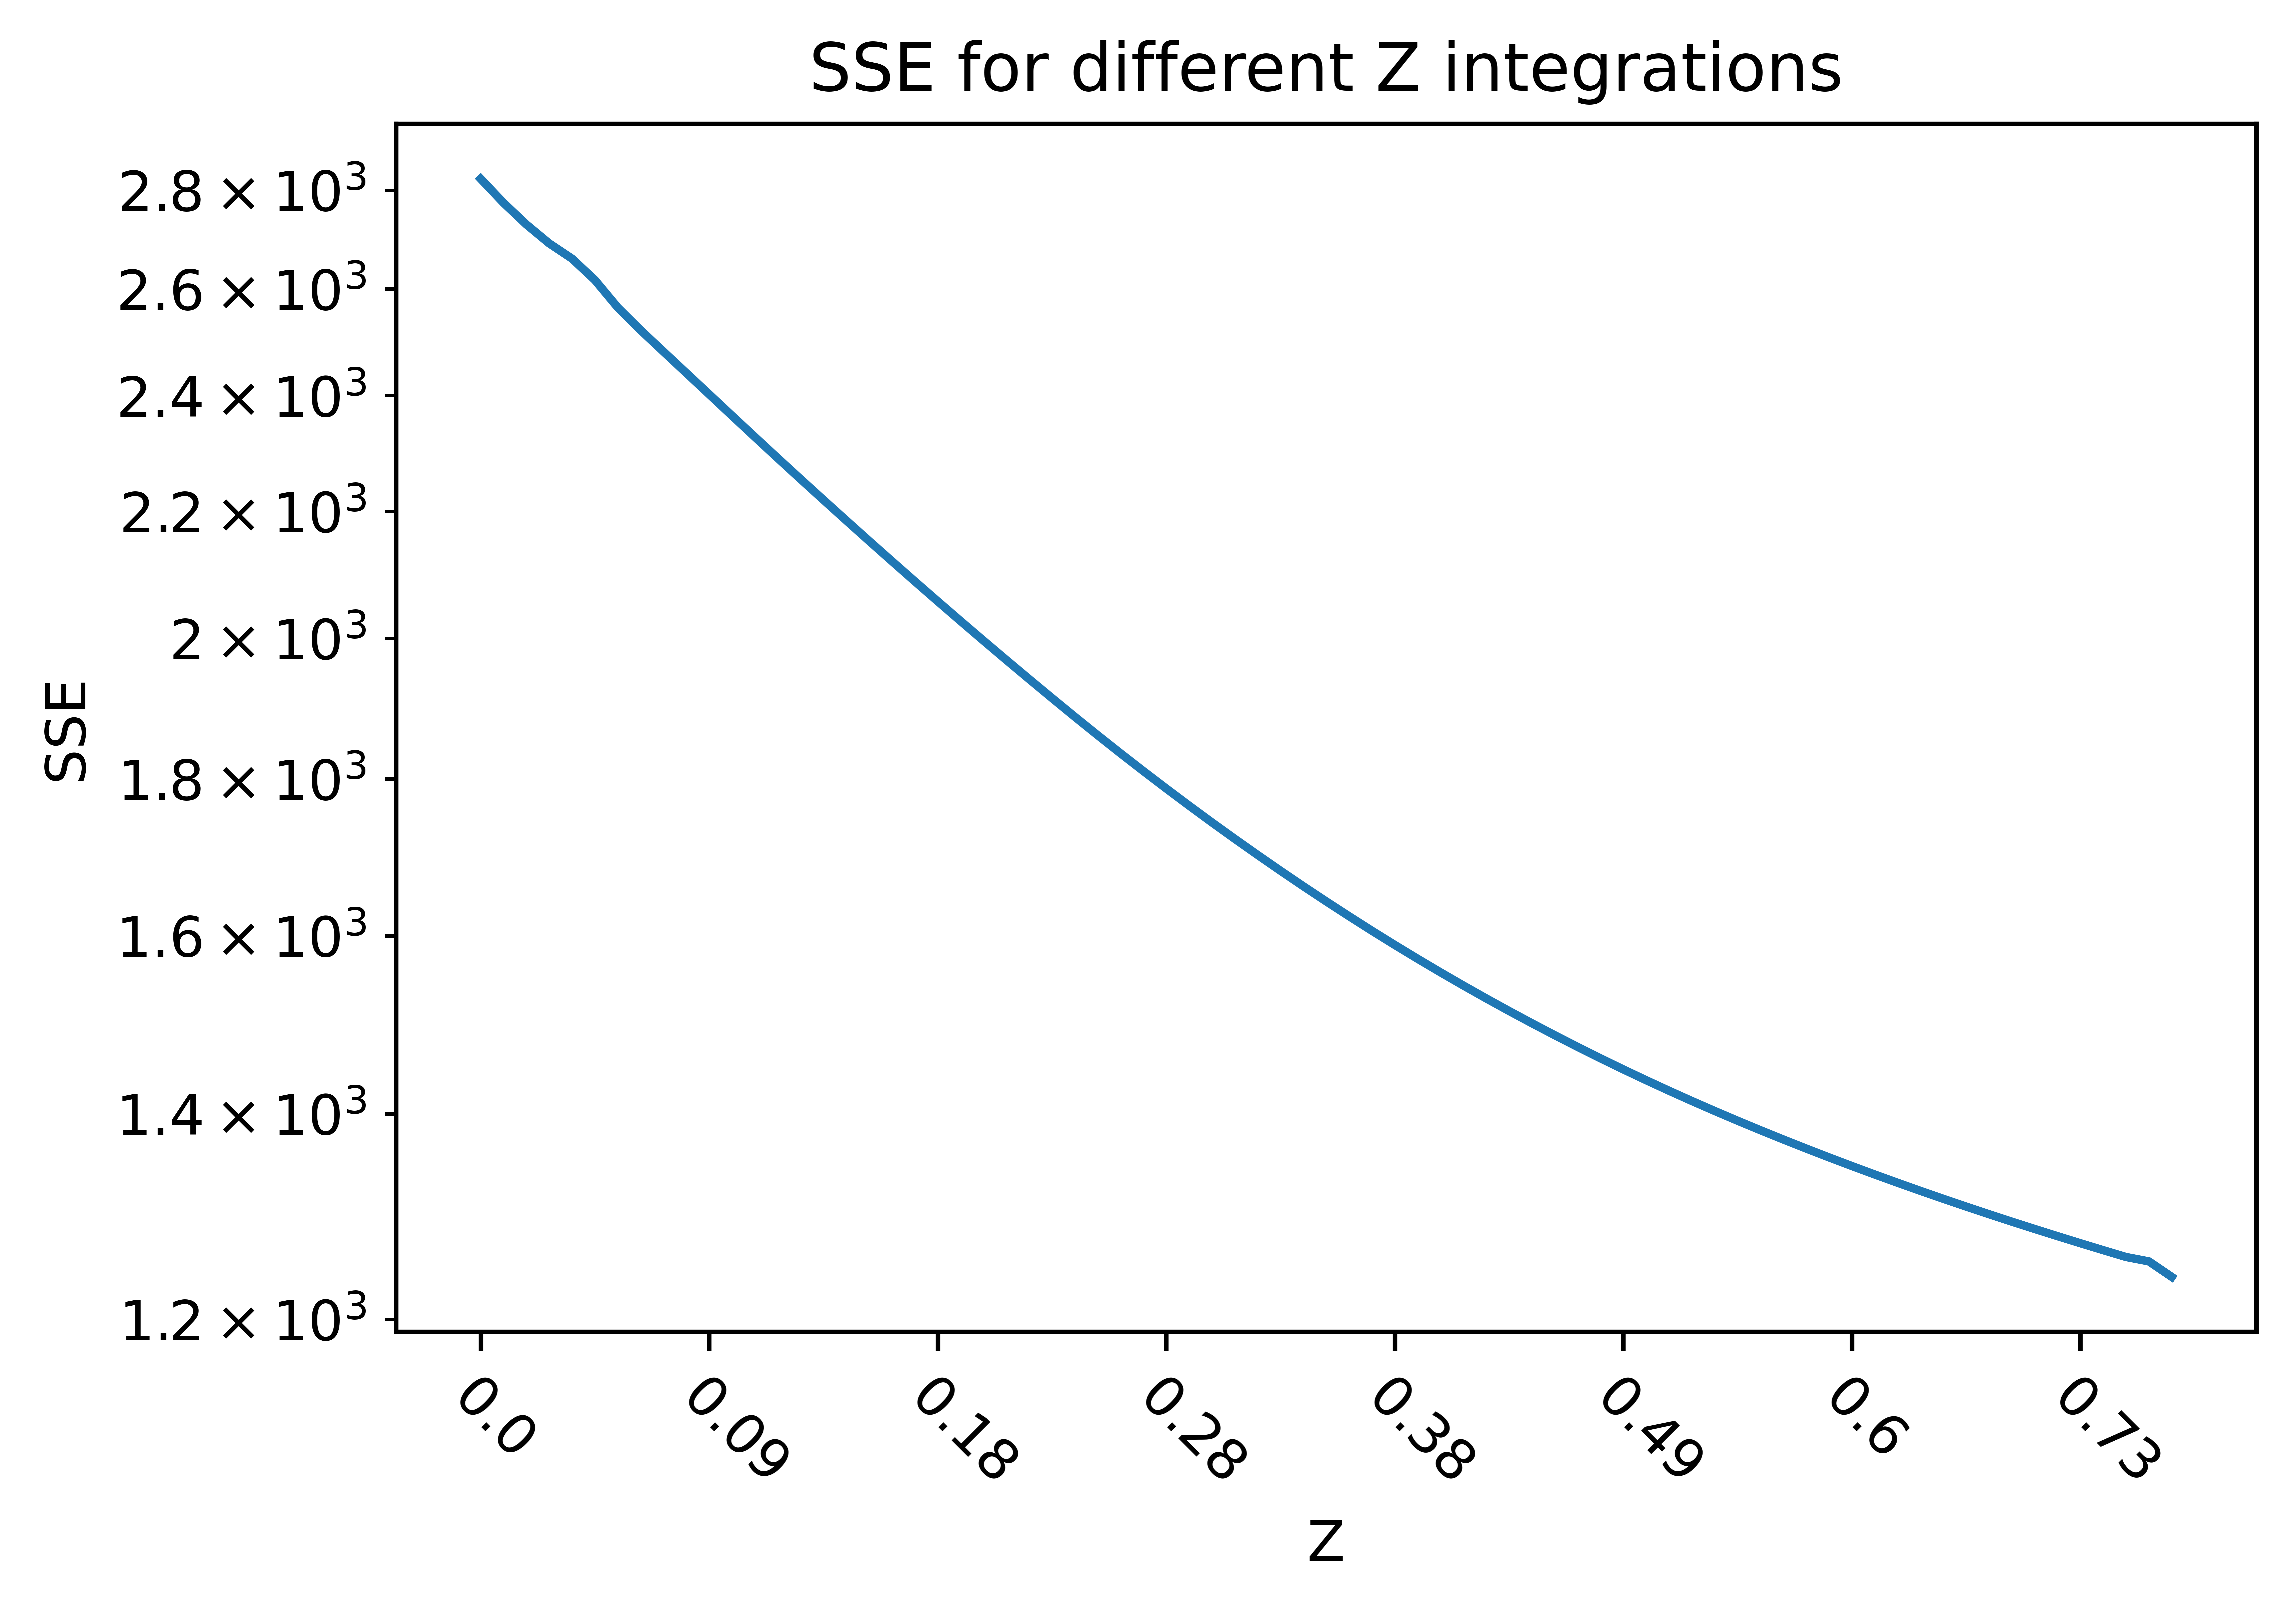

In [19]:
fig, ax = plt.subplots(dpi=1200)

im = ax.semilogy(RatioError);

labels = z2048[::10]

ax.set_xticks(np.arange(len(labels))*10)
ax.set_xticklabels(np.around(labels,2))

plt.setp(ax.get_xticklabels(), rotation=-45, ha="left",
         rotation_mode="anchor")

plt.xlabel("Z")
plt.ylabel("SSE")
ax.set_title("SSE for different Z integrations")

plt.show();

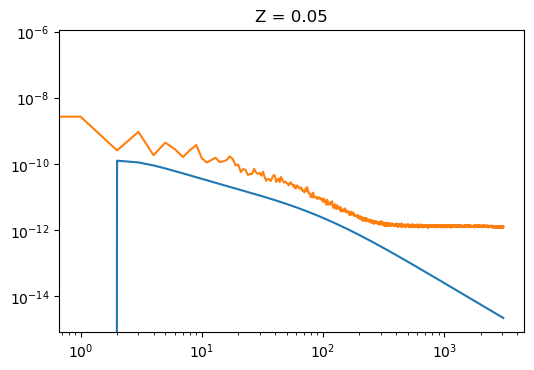

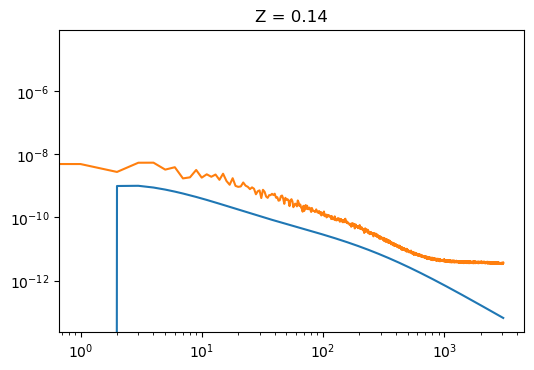

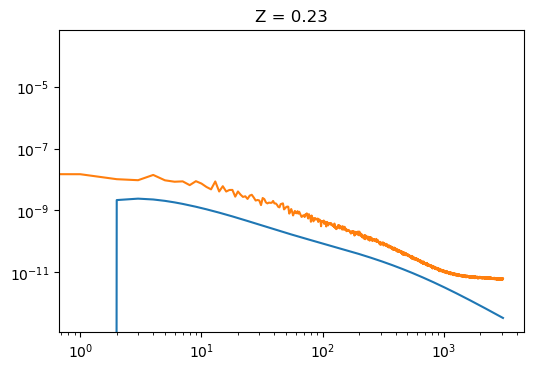

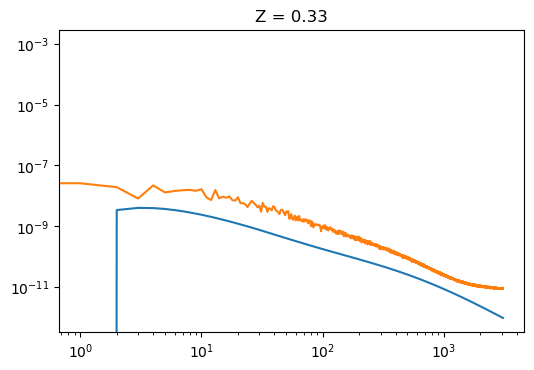

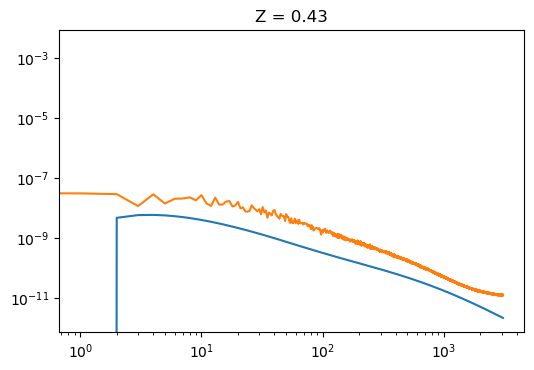

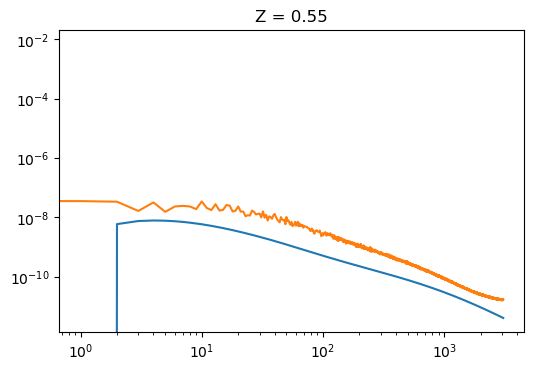

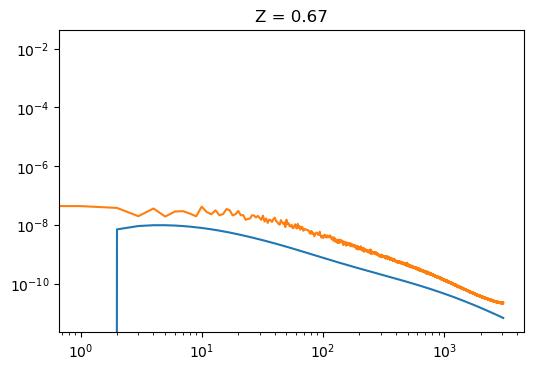

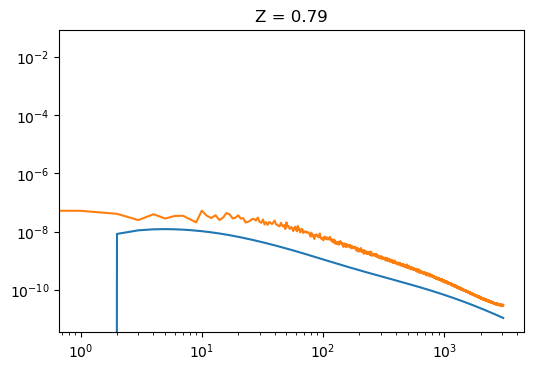

In [20]:
for i in range(5,numDivs,10):
    plt.figure(dpi=100)
    plt.loglog(cclOutK[i])
    plt.loglog(simOutK[i])
    plt.title("Z = " + str(np.around(z2048[i],2)))
    #plt.ylim(10**-9,10**-2);

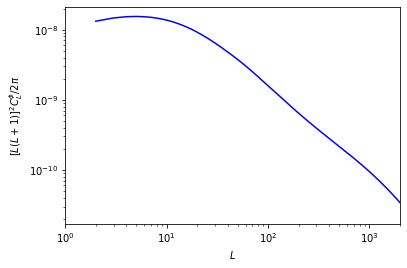

In [42]:
import camb
from camb import model, initialpower
import numpy as np
import matplotlib.pyplot as plt


nz = 100 #number of steps to use for the radial/redshift integration
kmax = 10  #kmax to use
#First set up parameters as usual
pars = camb.CAMBparams()
#cosmo = ccl.Cosmology(Omega_c = 0.262, Omega_b = 0.048, h = 0.69, sigma8 = 0.83, n_s = 0.96)
pars.set_cosmology(H0=69, ombh2=.02288528, omch2=0.1247682)
pars.InitPower.set_params(ns=0.965)

#For Limber result, want integration over \chi (comoving radial distance), from 0 to chi_*.
#so get background results to find chistar, set up a range in chi, and calculate corresponding redshifts
results = camb.get_background(pars)
chistar = results.conformal_time(0) - results.conformal_time(0.55)
chis = np.linspace(0,chistar,nz)
zs = results.redshift_at_comoving_radial_distance(chis)
#Calculate array of delta_chi, and drop first and last points where things go singular
dchis = (chis[2:]-chis[:-2])/2
chis = chis[1:-1]
zs = zs[1:-1]

#Get the matter power spectrum interpolation object (based on RectBivariateSpline). 
#Here for lensing we want the power spectrum of the Weyl potential.
PK = camb.get_matter_power_interpolator(pars, nonlinear=True, 
    hubble_units=False, k_hunit=False, kmax=kmax,
    var1=model.Transfer_Weyl,var2=model.Transfer_Weyl, zmax=zs[-1])

#Get lensing window function (flat universe)
win = ((chistar-chis)/(chis**2*chistar))**2
#Do integral over chi
ls = np.arange(2, 2500+1, dtype=np.float64)
cl_kappa=np.zeros(ls.shape)
w = np.ones(chis.shape) #this is just used to set to zero k values out of range of interpolation
for i, l in enumerate(ls):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=kmax]=0
    cl_kappa[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win/k**4)
cl_kappa*= (ls*(ls+1))**2


#Make plot. Expect difference at very low-L from inaccuracy in Limber approximation, and
#very high L from differences in kmax (lens_potential_accuracy is only 2, though good by eye here)
cl_limber= 4*cl_kappa/2/np.pi #convert kappa power to [l(l+1)]^2C_phi/2pi (what cl_camb is)
plt.loglog(ls, cl_limber, color='b')
plt.xlim([1,2000])
plt.ylabel('$[L(L+1)]^2C_L^{\phi}/2\pi$')
plt.xlabel('$L$');

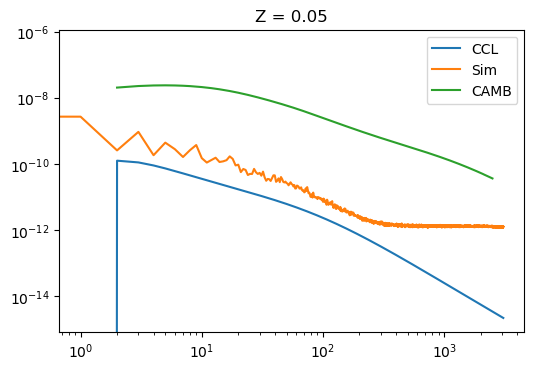

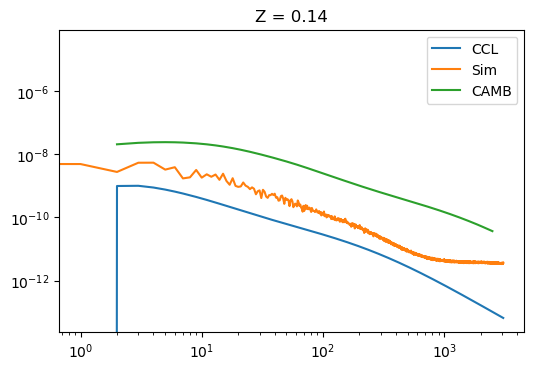

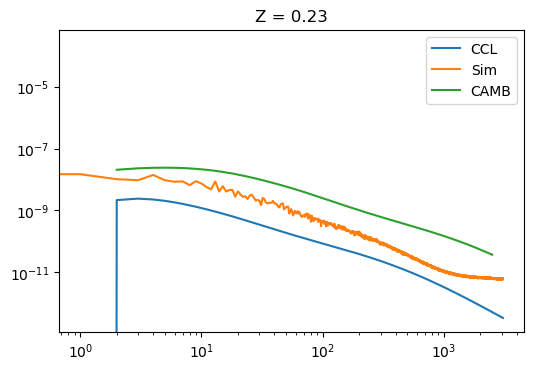

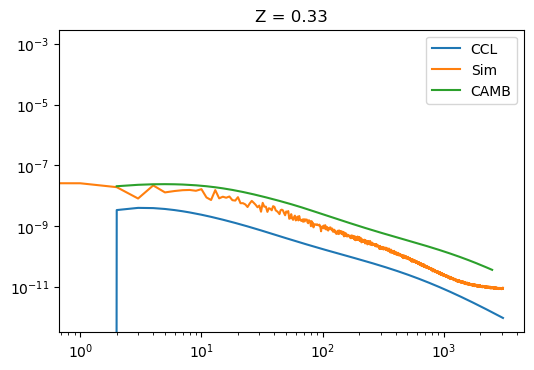

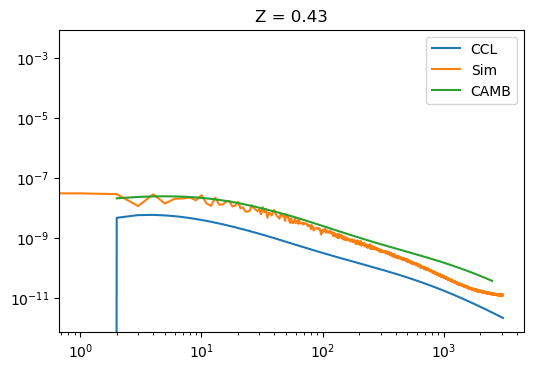

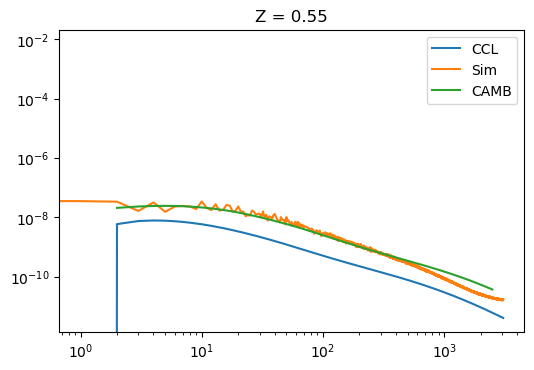

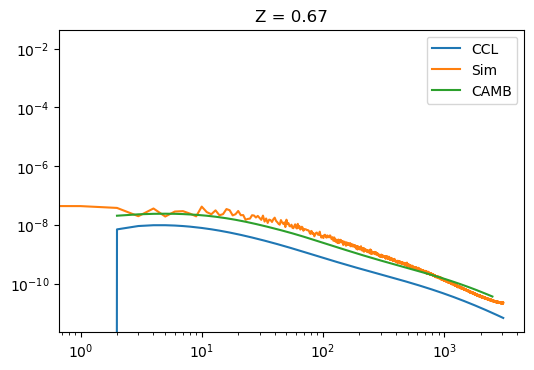

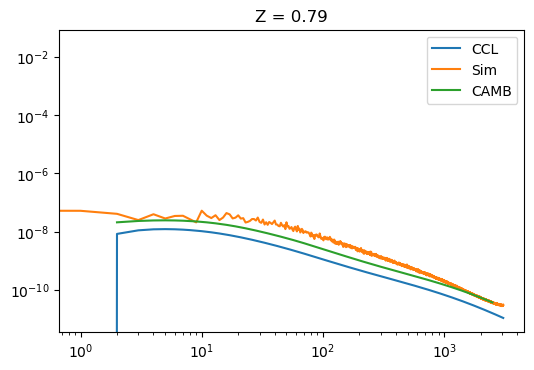

In [43]:
for i in range(5,numDivs,10):
    plt.figure(dpi=100)
    plt.loglog(cclOutK[i])
    plt.loglog(simOutK[i])
    plt.title("Z = " + str(np.around(z2048[i],2)))
    plt.loglog(ls,cl_kappa)
    plt.legend(("CCL","Sim", "CAMB"))
    #plt.ylim(10**-9,10**-2);